In [23]:
import pickle
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [24]:
def create_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f"Directory '{directory}' created successfully.")
    else:
        print(f"Directory '{directory}' already exists.")
file_name = "CEOD_data_mohamed_2019_feb_1-9_2.p"

splines = False
OD_scaling = False

if splines:
    directory_path = "C:/Users/mohsy/University/KLM/Thesis/My thesis/Plots/" + file_name.strip("CEOD_").strip(
        ".P") + "_splines"
else:
    directory_path = "C:/Users/mohsy/University/KLM/Thesis/My thesis/Plots/" + file_name.strip("CEOD_").strip(
        ".P") + "_one_equation"

create_directory(directory_path)

Directory 'C:/Users/mohsy/University/KLM/Thesis/My thesis/Plots/data_mohamed_2019_feb_1-9_2.p_one_equation' already exists.


In [25]:
def scaling_F(ReDP, ReOD, a, b):
    """
    Scaling function is a second degree polynomial
    :param ReDP: design spool speed
    :param ReOD: off-design spool speed
    :return: function value
    """
    return np.array(1 + a * ((ReOD - ReDP) / ReDP) + b * ((ReOD - ReDP) / ReDP) ** 2)

In [26]:
GEnx_OD, GEnx_OD_true, N, alt_time, All_Reynolds = pickle.load(open("Reynolds_pickle/Reynolds_" + file_name, "rb"))
Re2_DP, Re25_DP, Re3_DP, Re4_DP, Re49_DP, Re5_DP, Re14_DP, Re19_DP, _, _ = All_Reynolds[0][0, :].T

def get_results(OD_scaling, splines):
    if splines:
        if OD_scaling:
            All_validation_params, ALL_PRs, All_ETAs, All_Ws, All_TR, All_Fn = pickle.load(
                open("Results/Results_splines_" + file_name.strip("CEOD_"), "rb"))
        else:
            All_validation_params, ALL_PRs, All_ETAs, All_Ws, All_TR, All_Fn = pickle.load(
                open("Results/Results_splines_no_OD_scaling_" + file_name.strip("CEOD_"), "rb"))
    else:
        if OD_scaling:
            print("Reynolds scaling")
            All_validation_params, ALL_PRs, All_ETAs, All_Ws, All_TR, All_Fn = pickle.load(
                open("Results/Results_one_equation_" + file_name.strip("CEOD_"), "rb"))
        else:
            print('No scaling')
            All_validation_params, ALL_PRs, All_ETAs, All_Ws, All_TR, All_Fn = pickle.load(
                open("Results/Results_one_equation_no_OD_scaling_" + file_name.strip("CEOD_"), "rb"))
    return All_validation_params, ALL_PRs, All_ETAs, All_Ws, All_TR, All_Fn

In [38]:
X = [-0.04371352, 0.0813069, -0.09591862, 0.08377887, -0.07021975,
     -0.0691131, -0.05098189, 0.09924948, 0.04400945, -0.19977984,
     0.03704963, 0.00522859, -0.00374285, 0.02801069, -0.03519336,
     -0.06247652]
X_takeoff = X
X_climb = X
X_cruise = X

In [39]:
All_Valid_params_NS, ALL_PRs_NS, All_ETAs_NS, All_Ws_NS, All_TR_NS, All_Fn_NS = get_results(OD_scaling=False, splines=False)
All_Valid_params_WS, ALL_PRs_WS, All_ETAs_WS, All_Ws_WS, All_TR_ws, All_Fn_WS = get_results(OD_scaling=True, splines=False)

No scaling
Reynolds scaling


In [41]:
# for i, flight_cond in enumerate(["Take Off", "Climb", "Cruise"]):
#     OPR_WS, PRc_Fan_WS, PRd_Fan_WS, PR_HPC_WS, PR_HPT_WS, PR_LPT_WS, PR_d_WS, PR_nozzle_WS, PR_bypass_WS = ALL_PRs_WS[i].T
#     ETAc_Fan_WS, ETAd_Fan_WS, ETA_HPC_WS, ETA_HPT_WS, ETA_LPT_WS = All_ETAs_WS[i].T
#     W_14_WS, W_25_WS, W_4_WS, Wc2_WS, Wcc_fan_WS, Wcd_Fan_WS, Wc25_WS, Wc4_WS, Wc49_WS = All_Ws_WS[i].T
    
#     OPR_NS, PRc_Fan_NS, PRd_Fan_NS, PR_HPC_NS, PR_HPT_NS, PR_LPT_NS, PR_d_NS, PR_nozzle_NS, PR_bypass_NS = ALL_PRs_NS[i].T
#     ETAc_Fan_NS, ETAd_Fan_NS, ETA_HPC_NS, ETA_HPT_NS, ETA_LPT_NS = All_ETAs_NS[i].T
#     W_14_NS, W_25_NS, W_4_NS, Wc2_NS, Wcc_fan_NS, Wcd_Fan_NS, Wc25_NS, Wc4_NS, Wc49_NS = All_Ws_NS[i].T

#     Re2, Re25, Re3, Re4, Re49, Re5, Re14, Re19, _, _ = All_Reynolds[i].T
#     N1 = GEnx_OD[i][:, 0]

#     def tm_plot(y_array_unmodified, y_array, tm_type, x_iters, polynomials, re_dp, re):
#         fig, ax1 = plt.subplots(2, figsize=(6, 6), dpi=300)
#         for j, y_axis in enumerate(["PR", "Efficiency"]):
#             # y_array = [PR_HPC, ETA_HPC]
#             ax1[j].set_xlabel("N1 [%]")
#             ax1[j].set_ylabel(y_axis + "_" + tm_type + " [-]", color='tab:red')
#             ax1[j].scatter(N1, y_array[j], color="tab:red", s=2, alpha=0.7, label="OD Scaled")
#             ax1[j].scatter(N1, y_array_unmodified[j], color="darkmagenta", s=2, alpha=0.7, label="Unscaled")
#             ax1[j].tick_params(axis='y', labelcolor='tab:red')
#             ax1[j].grid(True, alpha=0.2)
#             # ax.set_title(title)

#             # Use ScalarFormatter for the y-axis
# #             x_formatter = ScalarFormatter(useMathText=True)
# #             x_formatter.set_scientific(True)
# #             x_formatter.set_powerlimits((-1, 1))  # Adjust the power limits for x-axis

#             y_formatter = ScalarFormatter(useMathText=True)
#             y_formatter.set_scientific(True)
#             y_formatter.set_powerlimits((-1, 1))  # Adjust the power limits for y-axis

# #             ax1[j].xaxis.set_major_formatter(x_formatter)
#             ax1[j].yaxis.set_major_formatter(y_formatter)

#             k = 2
#             ax2 = ax1[j].twinx()  # instantiate a second axes that shares the same x-axis
#             if tm_type[-1] == "T":
#                 y_axis = "Efficiency"
#             ax2.set_ylabel(f'SF_{y_axis}_{tm_type}',
#                            color='tab:blue')  # we already handled the x-label with ax1
#             x_iter = None
#             if tm_type[-1] == "T":
#                 x_iter = x_iters[0]
#             elif y_axis == "PR":
#                 x_iter = x_iters[0]
#             elif y_axis == "Efficiency":
#                 x_iter = x_iters[1]

#             ax2.scatter(N1, scaling_F(re_dp, re, polynomials[x_iter], polynomials[x_iter + 1]), color="tab:blue", s=2, alpha=0.7)
#             ax2.tick_params(axis='y', labelcolor="tab:blue")

#         fig.suptitle(tm_type + " " + flight_cond)
#         fig.tight_layout()  # otherwise the right y-label is slightly clipped
#         fig.legend(*fig.axes[0].get_legend_handles_labels(), loc='upper right')
#         plt.savefig(directory_path + "/" + tm_type + " " + flight_cond + ".jpg")
#         plt.show()


#     def Mass_flow_plots():
#         for mass_flow_unmodified, mass_flow, label, title in zip([W_14_NS, W_25_NS, W_4_NS], 
#                                            [W_14_WS, W_25_WS, W_4_WS],
#                                            ["W_14", "W_25", "W_4"],
#                                            ["Bypass", "Core - fwd combustor", "Core - aft combustor"]):
#             fig = plt.figure(figsize=(6, 3), dpi=300)
#             plt.scatter(N1, mass_flow, label='OD scaled', s=2, alpha=0.7, c='tab:red')
#             plt.scatter(N1, mass_flow_unmodified, label='Unscaled', s=2, alpha=0.7, c='darkmagenta')
#             plt.ylabel(f'{label} kg/s')
#             plt.xlabel('N1 [%]')
#             plt.suptitle(title + " " + flight_cond)
#             plt.grid()
#             plt.tight_layout()
#             plt.legend()
#             plt.savefig(directory_path + "/" + title + " " + flight_cond + ".jpg")
#             plt.show()

#     if i == 0:
#         print("take off start")
#         X = X_takeoff
#     elif i == 1:
#         print("climb start")
#         X = X_climb
#     else:
#         print("cruise start")
#         X = X_cruise

#     LPCc_X = X[:6]
#     LPCd_X = X[6:12]
#     HPC_X = X[12:18]
#     HPT_X = X[18:20]
#     LPT_X = X[20:22]

#     tm_plot(y_array_unmodified=[PR_HPC_NS, ETA_HPC_NS], y_array=[PR_HPC_WS, ETA_HPC_WS], tm_type="HPC", x_iters=[0, 4], polynomials=HPC_X, re_dp=Re3_DP, re=Re3)
#     tm_plot(y_array_unmodified=[PRc_Fan_NS, ETAc_Fan_NS], y_array=[PRc_Fan_WS, ETAc_Fan_WS], tm_type="LPCc", x_iters=[0, 4], polynomials=LPCc_X, re_dp=Re25_DP, re=Re25)
#     tm_plot(y_array_unmodified=[PRd_Fan_NS, ETAd_Fan_NS], y_array=[PRd_Fan_WS, ETAd_Fan_WS], tm_type="LPCd", x_iters=[0, 4], polynomials=LPCd_X, re_dp=Re19_DP, re=Re19)
#     tm_plot(y_array_unmodified=[PR_HPT_NS, ETA_HPT_NS], y_array=[PR_HPT_WS, ETA_HPT_WS], tm_type="HPT", x_iters=[0], polynomials=HPT_X, re_dp=Re49_DP, re=Re49)
#     tm_plot(y_array_unmodified=[PR_LPT_NS, ETA_LPT_NS], y_array=[PR_LPT_WS, ETA_LPT_WS], tm_type="LPT", x_iters=[0], polynomials=LPT_X, re_dp=Re5_DP, re=Re5)
#     Mass_flow_plots()


take off start


IndexError: list index out of range

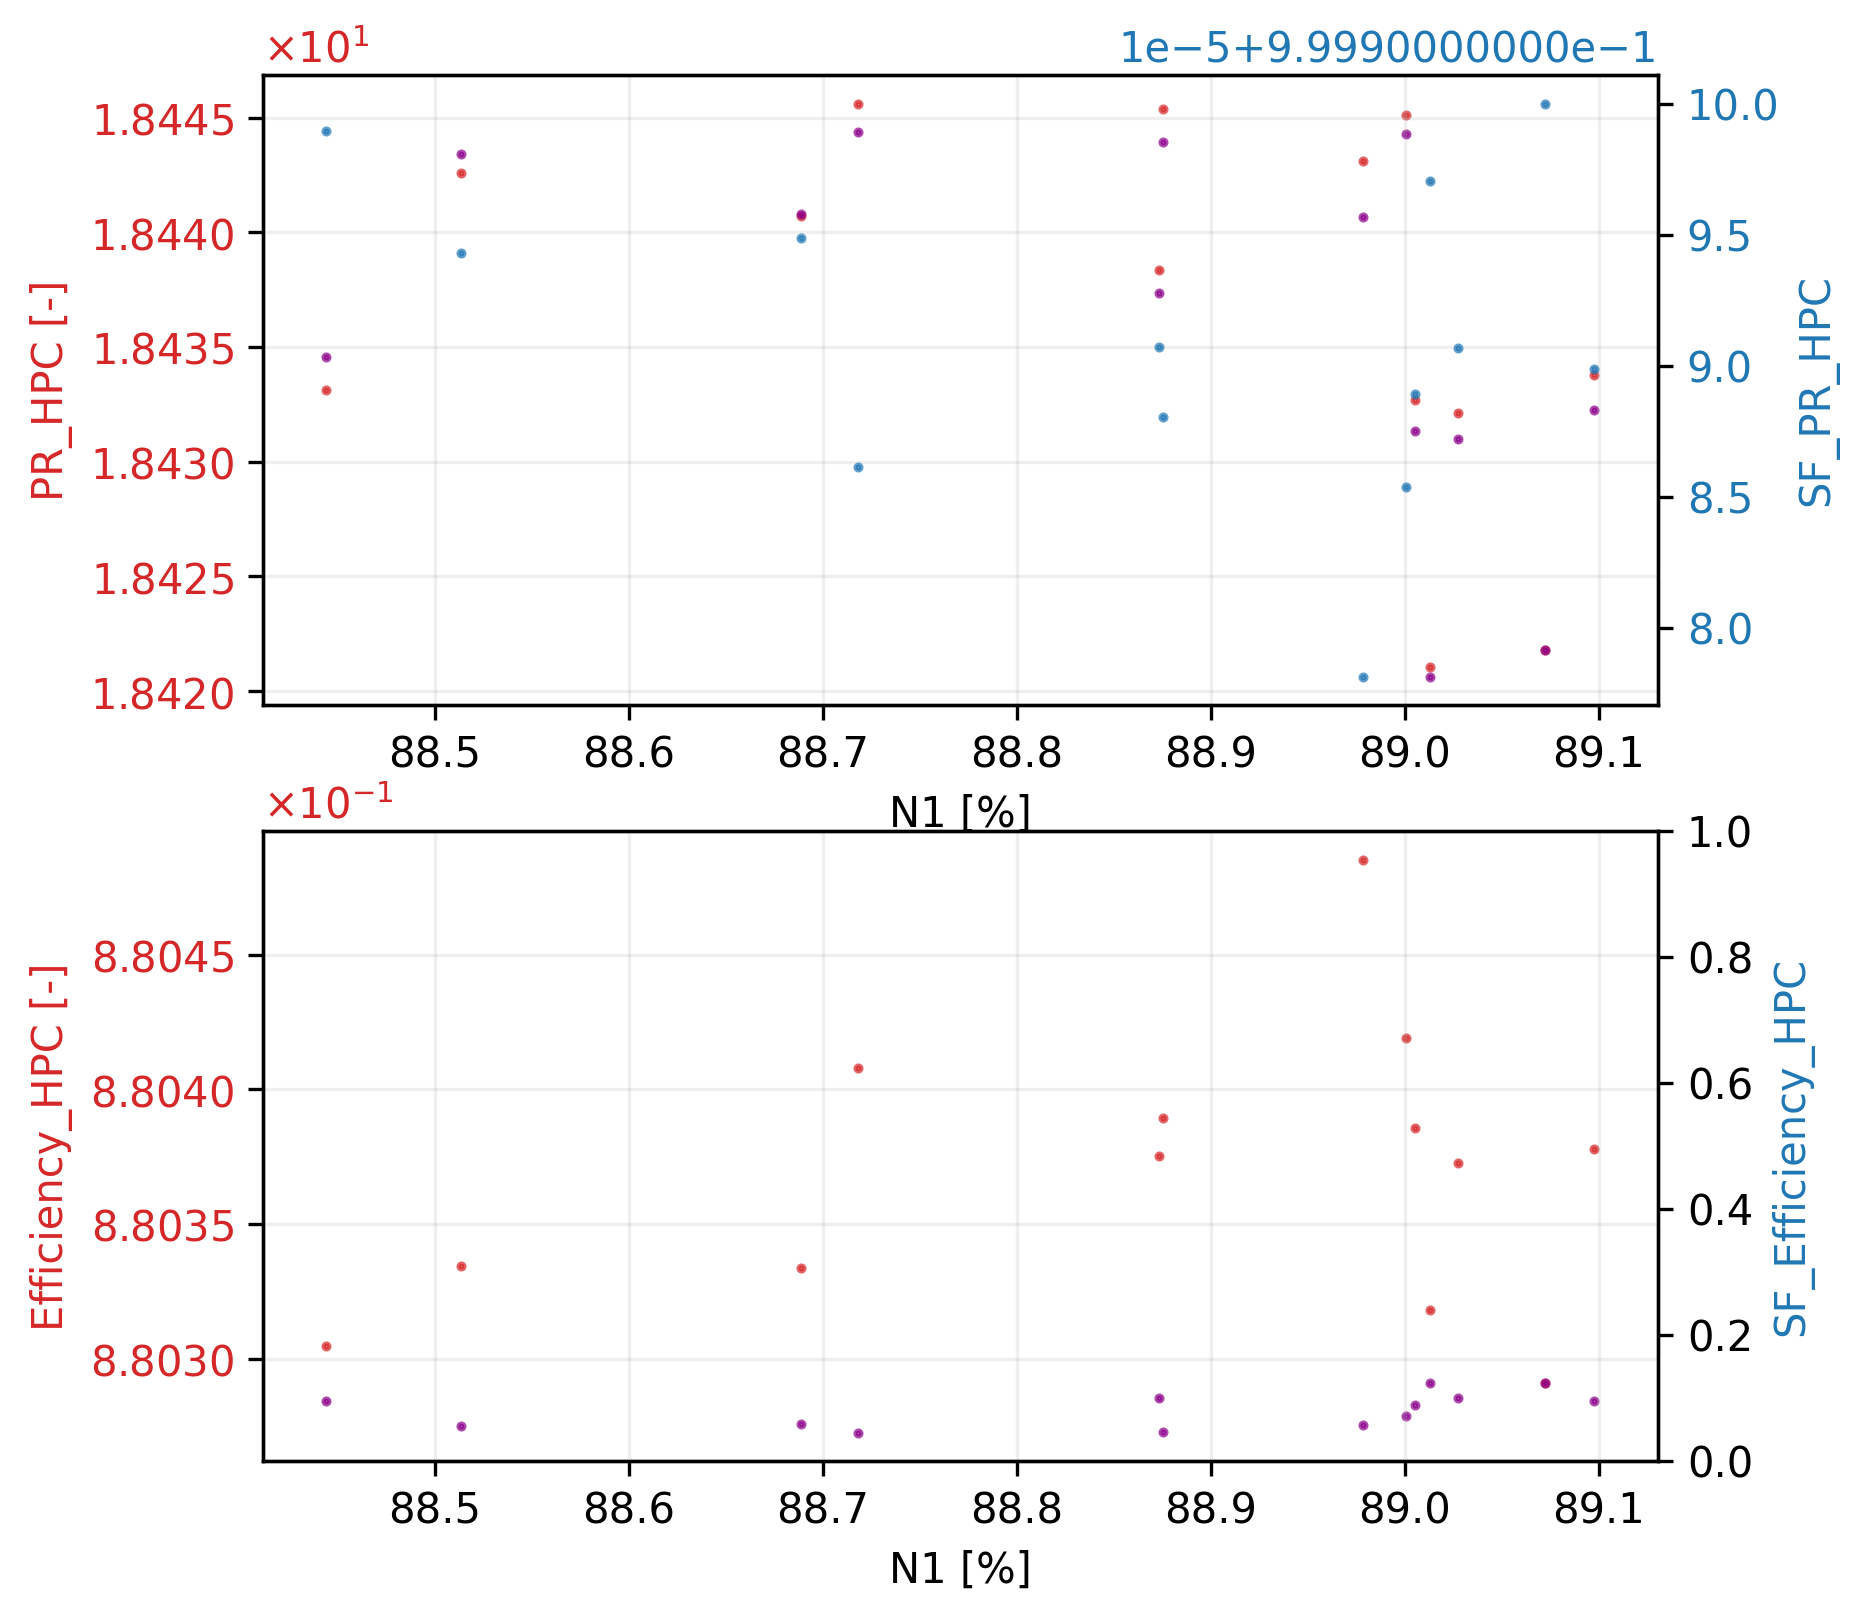

In [40]:
for i, flight_cond in enumerate(["Take Off", "Climb", "Cruise"]):
    OPR_WS, PRc_Fan_WS, PRd_Fan_WS, PR_HPC_WS, PR_HPT_WS, PR_LPT_WS, PR_d_WS, PR_nozzle_WS, PR_bypass_WS = ALL_PRs_WS[i].T
    ETAc_Fan_WS, ETAd_Fan_WS, ETA_HPC_WS, ETA_HPT_WS, ETA_LPT_WS = All_ETAs_WS[i].T
    W_14_WS, W_25_WS, W_4_WS, Wc2_WS, Wcc_fan_WS, Wcd_Fan_WS, Wc25_WS, Wc4_WS, Wc49_WS = All_Ws_WS[i].T
    
    OPR_NS, PRc_Fan_NS, PRd_Fan_NS, PR_HPC_NS, PR_HPT_NS, PR_LPT_NS, PR_d_NS, PR_nozzle_NS, PR_bypass_NS = ALL_PRs_NS[i].T
    ETAc_Fan_NS, ETAd_Fan_NS, ETA_HPC_NS, ETA_HPT_NS, ETA_LPT_NS = All_ETAs_NS[i].T
    W_14_NS, W_25_NS, W_4_NS, Wc2_NS, Wcc_fan_NS, Wcd_Fan_NS, Wc25_NS, Wc4_NS, Wc49_NS = All_Ws_NS[i].T

    Re2, Re25, Re3, Re4, Re49, Re5, Re14, Re19, _, _ = All_Reynolds[i].T
    N1 = GEnx_OD[i][:, 0]

    def tm_plot(y_array_unmodified, y_array, tm_type, x_iters, polynomials, re_dp, re):
        fig, ax1 = plt.subplots(2, figsize=(6, 6), dpi=300)
        for j, y_axis in enumerate(["PR", "Efficiency"]):
            # y_array = [PR_HPC, ETA_HPC]
            ax1[j].set_xlabel("N1 [%]")
            ax1[j].set_ylabel(y_axis + "_" + tm_type + " [-]", color='tab:red')
            ax1[j].scatter(N1, y_array[j], color="tab:red", s=2, alpha=0.7, label="OD Scaled")
            ax1[j].scatter(N1, y_array_unmodified[j], color="darkmagenta", s=2, alpha=0.7, label="Unscaled")
            ax1[j].tick_params(axis='y', labelcolor='tab:red')
            ax1[j].grid(True, alpha=0.2)
            # ax.set_title(title)

            # Use ScalarFormatter for the y-axis
#             x_formatter = ScalarFormatter(useMathText=True)
#             x_formatter.set_scientific(True)
#             x_formatter.set_powerlimits((-1, 1))  # Adjust the power limits for x-axis

            y_formatter = ScalarFormatter(useMathText=True)
            y_formatter.set_scientific(True)
            y_formatter.set_powerlimits((-1, 1))  # Adjust the power limits for y-axis

#             ax1[j].xaxis.set_major_formatter(x_formatter)
            ax1[j].yaxis.set_major_formatter(y_formatter)

            k = 2
            ax2 = ax1[j].twinx()  # instantiate a second axes that shares the same x-axis
            if tm_type[-1] == "T":
                y_axis = "Efficiency"
            ax2.set_ylabel(f'SF_{y_axis}_{tm_type}',
                           color='tab:blue')  # we already handled the x-label with ax1
            x_iter = None
            if tm_type[-1] == "T":
                x_iter = x_iters[0]
            elif y_axis == "PR":
                x_iter = x_iters[0]
            elif y_axis == "Efficiency":
                x_iter = x_iters[1]

            ax2.scatter(N1, scaling_F(re_dp, re, polynomials[x_iter], polynomials[x_iter + 1]), color="tab:blue", s=2, alpha=0.7)
            ax2.tick_params(axis='y', labelcolor="tab:blue")

        fig.suptitle(tm_type + " " + flight_cond)
        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        fig.legend(*fig.axes[0].get_legend_handles_labels(), loc='upper right')
        plt.savefig(directory_path + "/" + tm_type + " " + flight_cond + ".jpg")
        plt.show()


    def Mass_flow_plots():
        for mass_flow_unmodified, mass_flow, label, title in zip([W_14_NS, W_25_NS, W_4_NS], 
                                           [W_14_WS, W_25_WS, W_4_WS],
                                           ["W_14", "W_25", "W_4"],
                                           ["Bypass", "Core - fwd combustor", "Core - aft combustor"]):
            fig = plt.figure(figsize=(6, 3), dpi=300)
            plt.scatter(N1, mass_flow, label='OD scaled', s=2, alpha=0.7, c='tab:red')
            plt.scatter(N1, mass_flow_unmodified, label='Unscaled', s=2, alpha=0.7, c='darkmagenta')
            plt.ylabel(f'{label} kg/s')
            plt.xlabel('N1 [%]')
            plt.suptitle(title + " " + flight_cond)
            plt.grid()
            plt.tight_layout()
            plt.legend()
            plt.savefig(directory_path + "/" + title + " " + flight_cond + ".jpg")
            plt.show()

    if i == 0:
        print("take off start")
        X = X_takeoff
    elif i == 1:
        print("climb start")
        X = X_climb
    else:
        print("cruise start")
        X = X_cruise

    LPCc_X = X[:6]
    LPCd_X = X[6:12]
    HPC_X = X[12:18]
    HPT_X = X[18:20]
    LPT_X = X[20:22]

    tm_plot(y_array_unmodified=[PR_HPC_NS, ETA_HPC_NS], y_array=[PR_HPC_WS, ETA_HPC_WS], tm_type="HPC", x_iters=[0, 4], polynomials=HPC_X, re_dp=Re3_DP, re=Re3)
    tm_plot(y_array_unmodified=[PRc_Fan_NS, ETAc_Fan_NS], y_array=[PRc_Fan_WS, ETAc_Fan_WS], tm_type="LPCc", x_iters=[0, 4], polynomials=LPCc_X, re_dp=Re25_DP, re=Re25)
    tm_plot(y_array_unmodified=[PRd_Fan_NS, ETAd_Fan_NS], y_array=[PRd_Fan_WS, ETAd_Fan_WS], tm_type="LPCd", x_iters=[0, 4], polynomials=LPCd_X, re_dp=Re19_DP, re=Re19)
    tm_plot(y_array_unmodified=[PR_HPT_NS, ETA_HPT_NS], y_array=[PR_HPT_WS, ETA_HPT_WS], tm_type="HPT", x_iters=[0], polynomials=HPT_X, re_dp=Re49_DP, re=Re49)
    tm_plot(y_array_unmodified=[PR_LPT_NS, ETA_LPT_NS], y_array=[PR_LPT_WS, ETA_LPT_WS], tm_type="LPT", x_iters=[0], polynomials=LPT_X, re_dp=Re5_DP, re=Re5)
    Mass_flow_plots()


In [30]:
def barC(outputval, selected_k, params_out, y_name, title, save_name):
    plt.rcParams['figure.dpi'] = 500
    outp_length = len(outputval[0]) if isinstance(outputval[0], list) else len(outputval)
    len_k = len(selected_k) if len(selected_k) == 3 else 1
    w = 6  # in inch the width of the figure was 6
    h = 3  # height in inch was 3
    r = np.arange(outp_length)
    r = r * w / outp_length
    width = 0.18  # the bar with was0.18
    fig, ax = plt.subplots(1, 1, figsize=(w, h))
    colorl = ['coral', 'goldenrod', 'royalblue']

    for i in range(len_k):
        label = selected_k[i] if len(selected_k) == 3 else selected_k
        rec = ax.bar(r + width * i, np.round(outputval[i], 1), color=colorl[i], width=width, edgecolor=colorl[i],
                     label=label,
                     tick_label=outputval[i])
        # ax.bar_label(rec, padding=3)
    ax.yaxis.grid()  # grid lines
    ax.set_axisbelow(True)  # grid lines are behind the rest
    plt.xlabel("Parameters")
    plt.ylabel(y_name)
    # plt.title("Sensitivity ")
    plt.ylim(0, 8.5)
    plt.xticks(r + width * len_k / 2.6, params_out)  # was 2.6
    plt.yticks(np.arange(9))
    plt.legend(loc='upper right')  # lower
    plt.title(title)
    fig.tight_layout()
    plt.margins(y=0.1)
    plt.savefig("C:/Users/mohsy/University/KLM/Thesis/My thesis/Plots/Report plots/" 
           + save_name + '.jpeg')
    plt.show()

In [31]:
paramE = ["TT25", "TT3", "Ps3", "TT49", "Wf", "N2"]
def calc_change(All_valid_params):
    All_change = []
    meanL = []
    paramE = ["TT25", "TT3", "Ps3", "TT49", "Wf", "N2"]
    for flight_phase, legend in zip(range(3), ['Take off', 'Climb', 'Cruise']):
        y_sim_valid = All_valid_params[flight_phase]
        trueVal = GEnx_OD_true[flight_phase]
        change = (trueVal - y_sim_valid) / (trueVal + 0.000001)
        meanE = 100 * np.sqrt(np.mean(change ** 2, axis=0))
        All_change.append(change)
        meanL.append(list(meanE))
    All_change = [item for sublist in All_change for item in sublist]
    Rms = np.sqrt(np.mean(np.mean(np.array(All_change) ** 2, axis=0)))
    return meanL, Rms

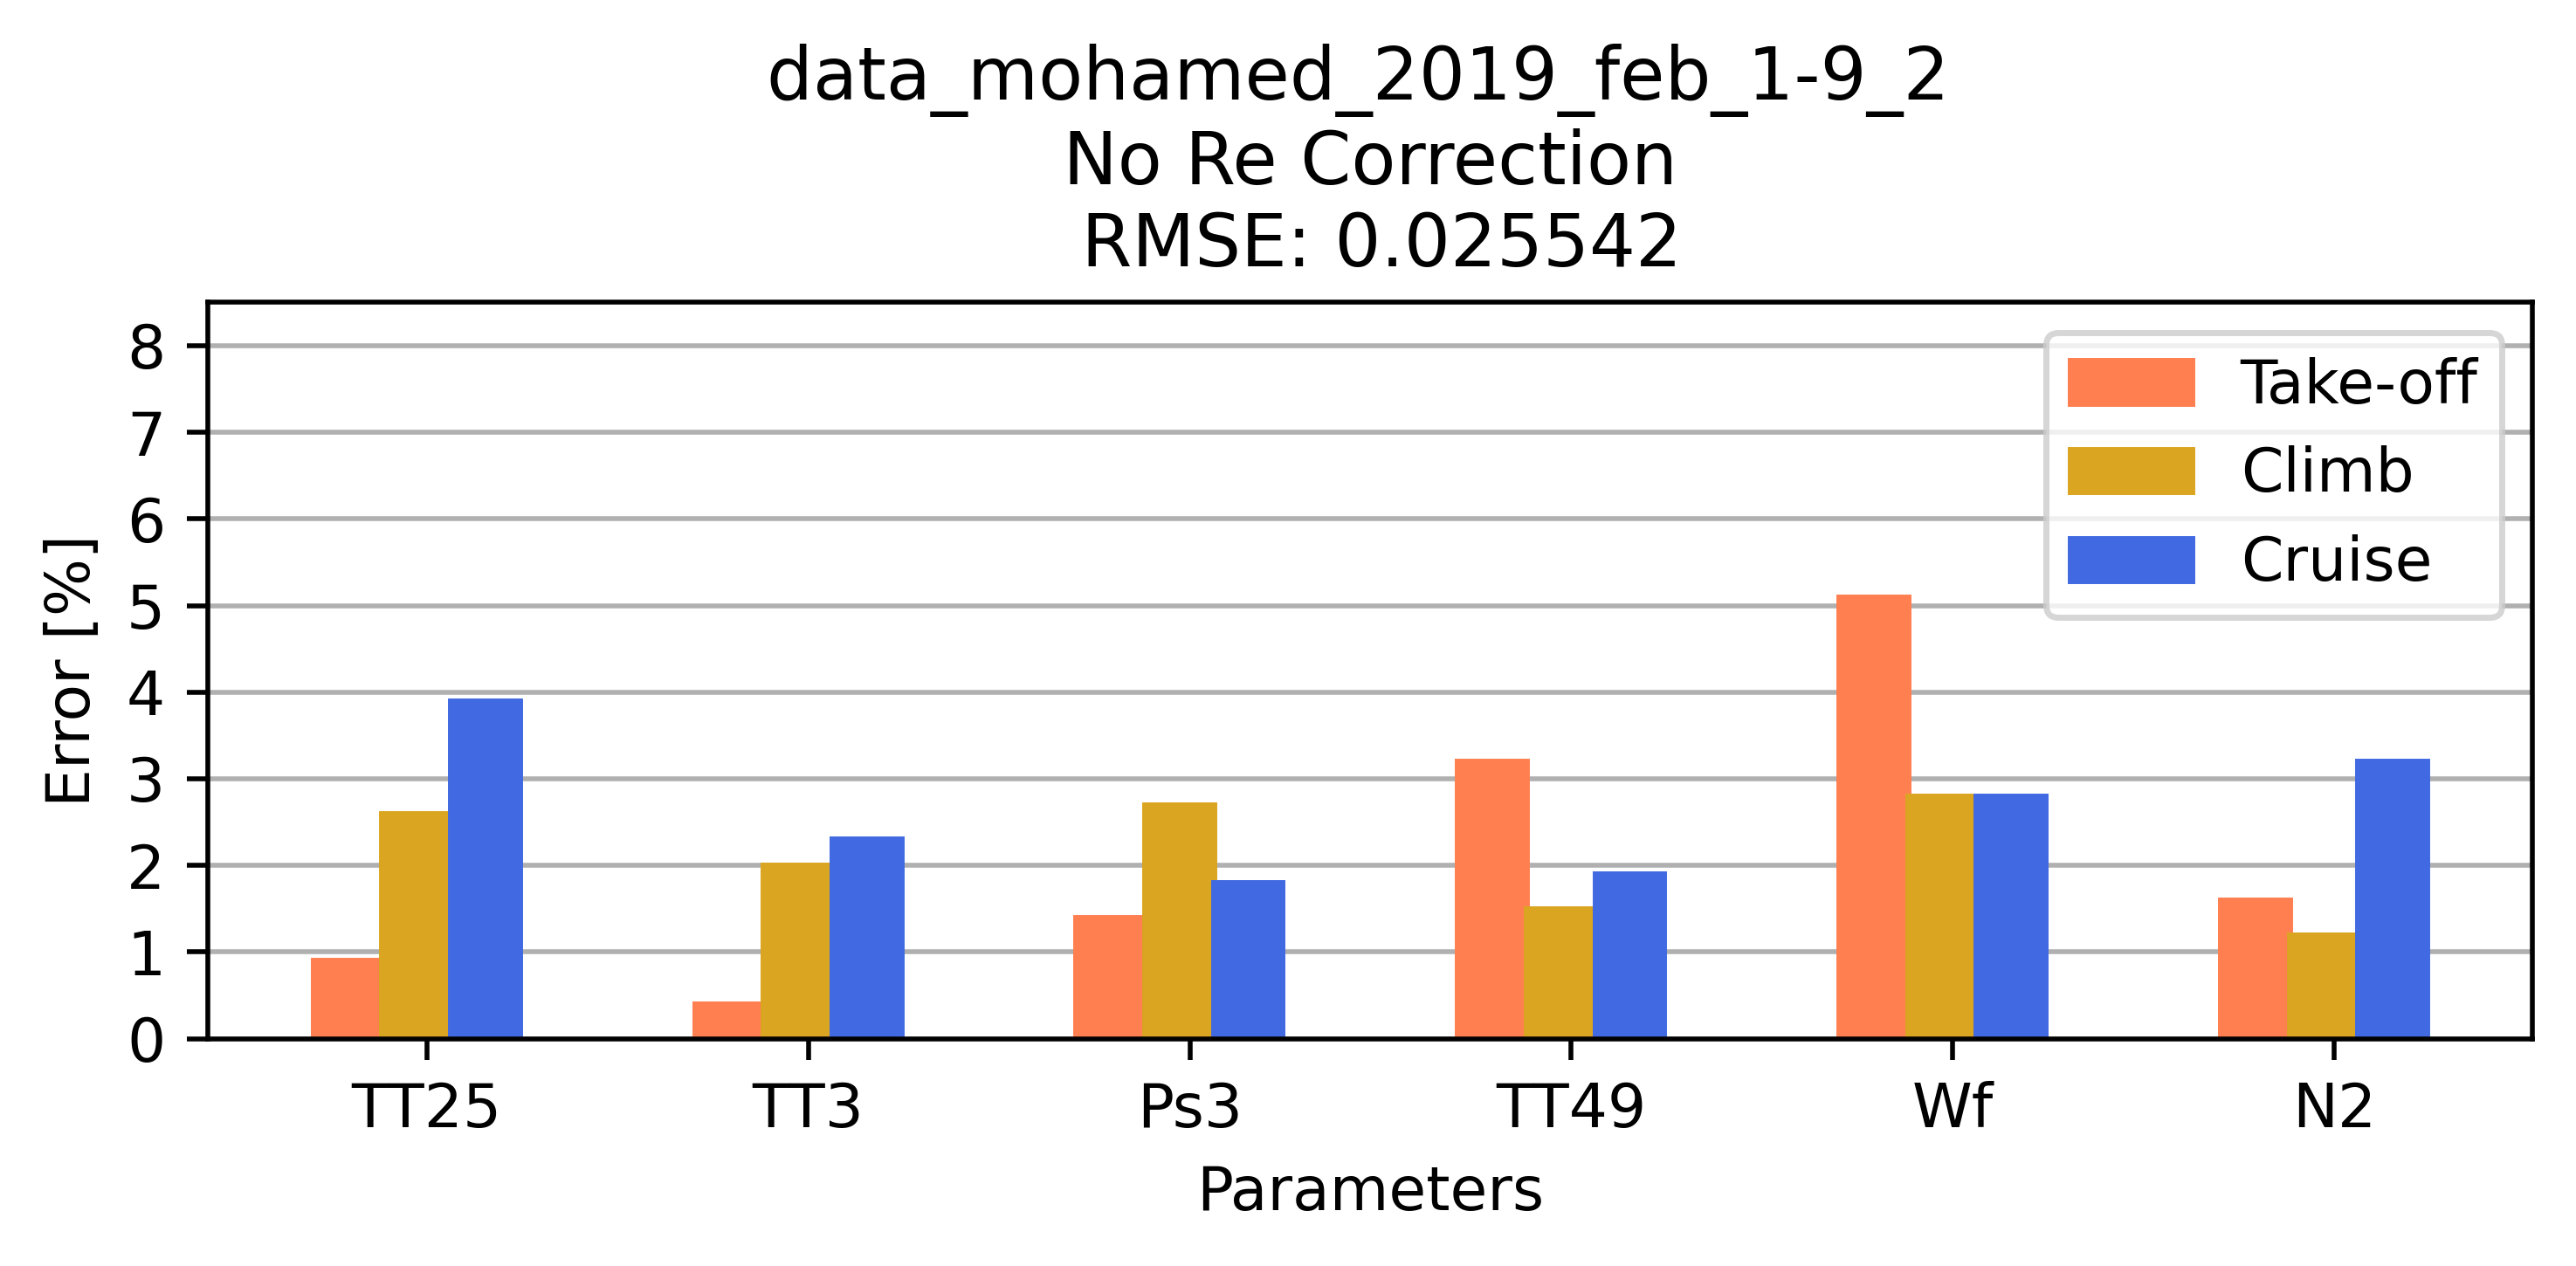

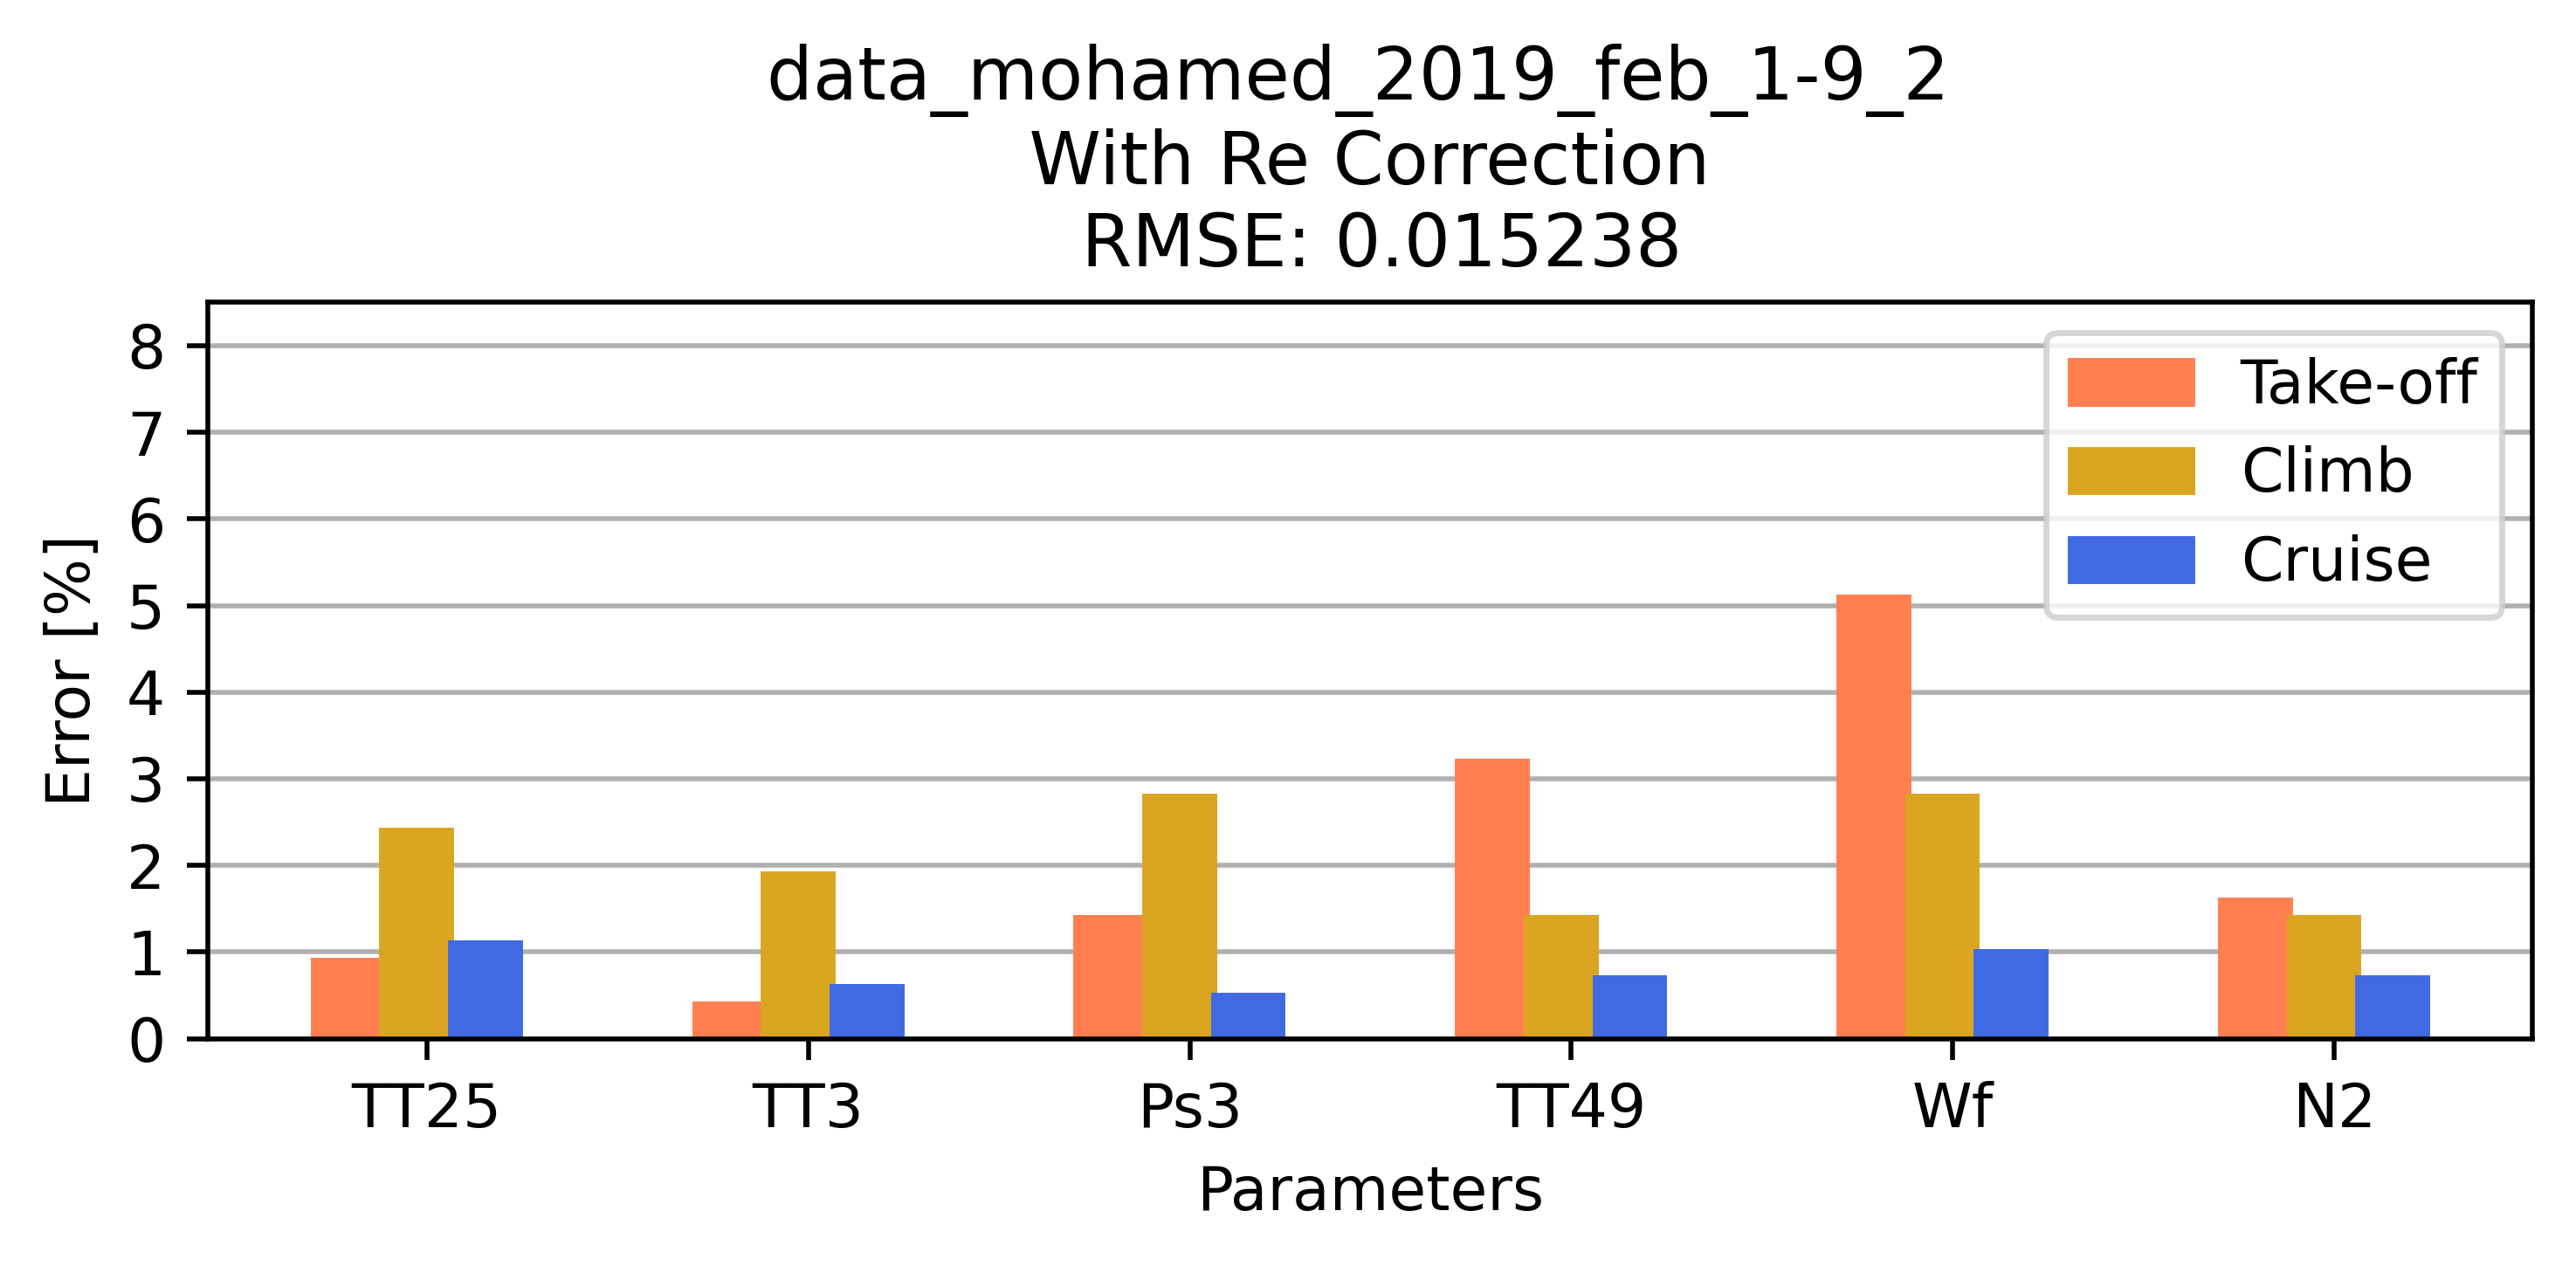

In [32]:
meanL, Rms,  = calc_change(All_Valid_params_NS)
barC(meanL, ['Take-off', 'Climb', 'Cruise'], paramE, "Error [%]",
             f'{file_name.strip("CEOD_").strip(".p")} \n No Re Correction \n RMSE: {str(round(Rms, 6))}',
    save_name=f'{file_name.strip("CEOD_").strip(".p")} No Re Correction')

meanL, Rms, = calc_change(All_Valid_params_WS)
barC(meanL, ['Take-off', 'Climb', 'Cruise'], paramE, "Error [%]",
             f'{file_name.strip("CEOD_").strip(".p")} \n With Re Correction \n RMSE: {str(round(Rms, 6))}',
    save_name=f'{file_name.strip("CEOD_").strip(".p")} With Re Correction')

In [33]:
def plot_error(All_Valid_params, save_name):
    for flight_phase, name in enumerate(["Take Off", "Climb", "Cruise"]):
        inputDat = GEnx_OD[flight_phase]
        y_sim_valid = All_Valid_params[flight_phase]
        trueVal = GEnx_OD_true[flight_phase]
        change = (trueVal - y_sim_valid) / (trueVal + 0.000001) * 100
        for i in range(len(paramE)):
            plt.scatter(inputDat[:, 0], change[:, i], label=paramE[i])
        plt.xlabel('Corrected Fan Speed [%]')
        plt.ylabel('Error (CEOD - GSP) [%]')
        plt.legend(loc='lower center')
        # plt.ylim(-10, 6)
        plt.savefig("C:/Users/mohsy/University/KLM/Thesis/My thesis/Plots/Report plots/" 
           + save_name + f'_{name}' + '.jpeg')
        plt.show()

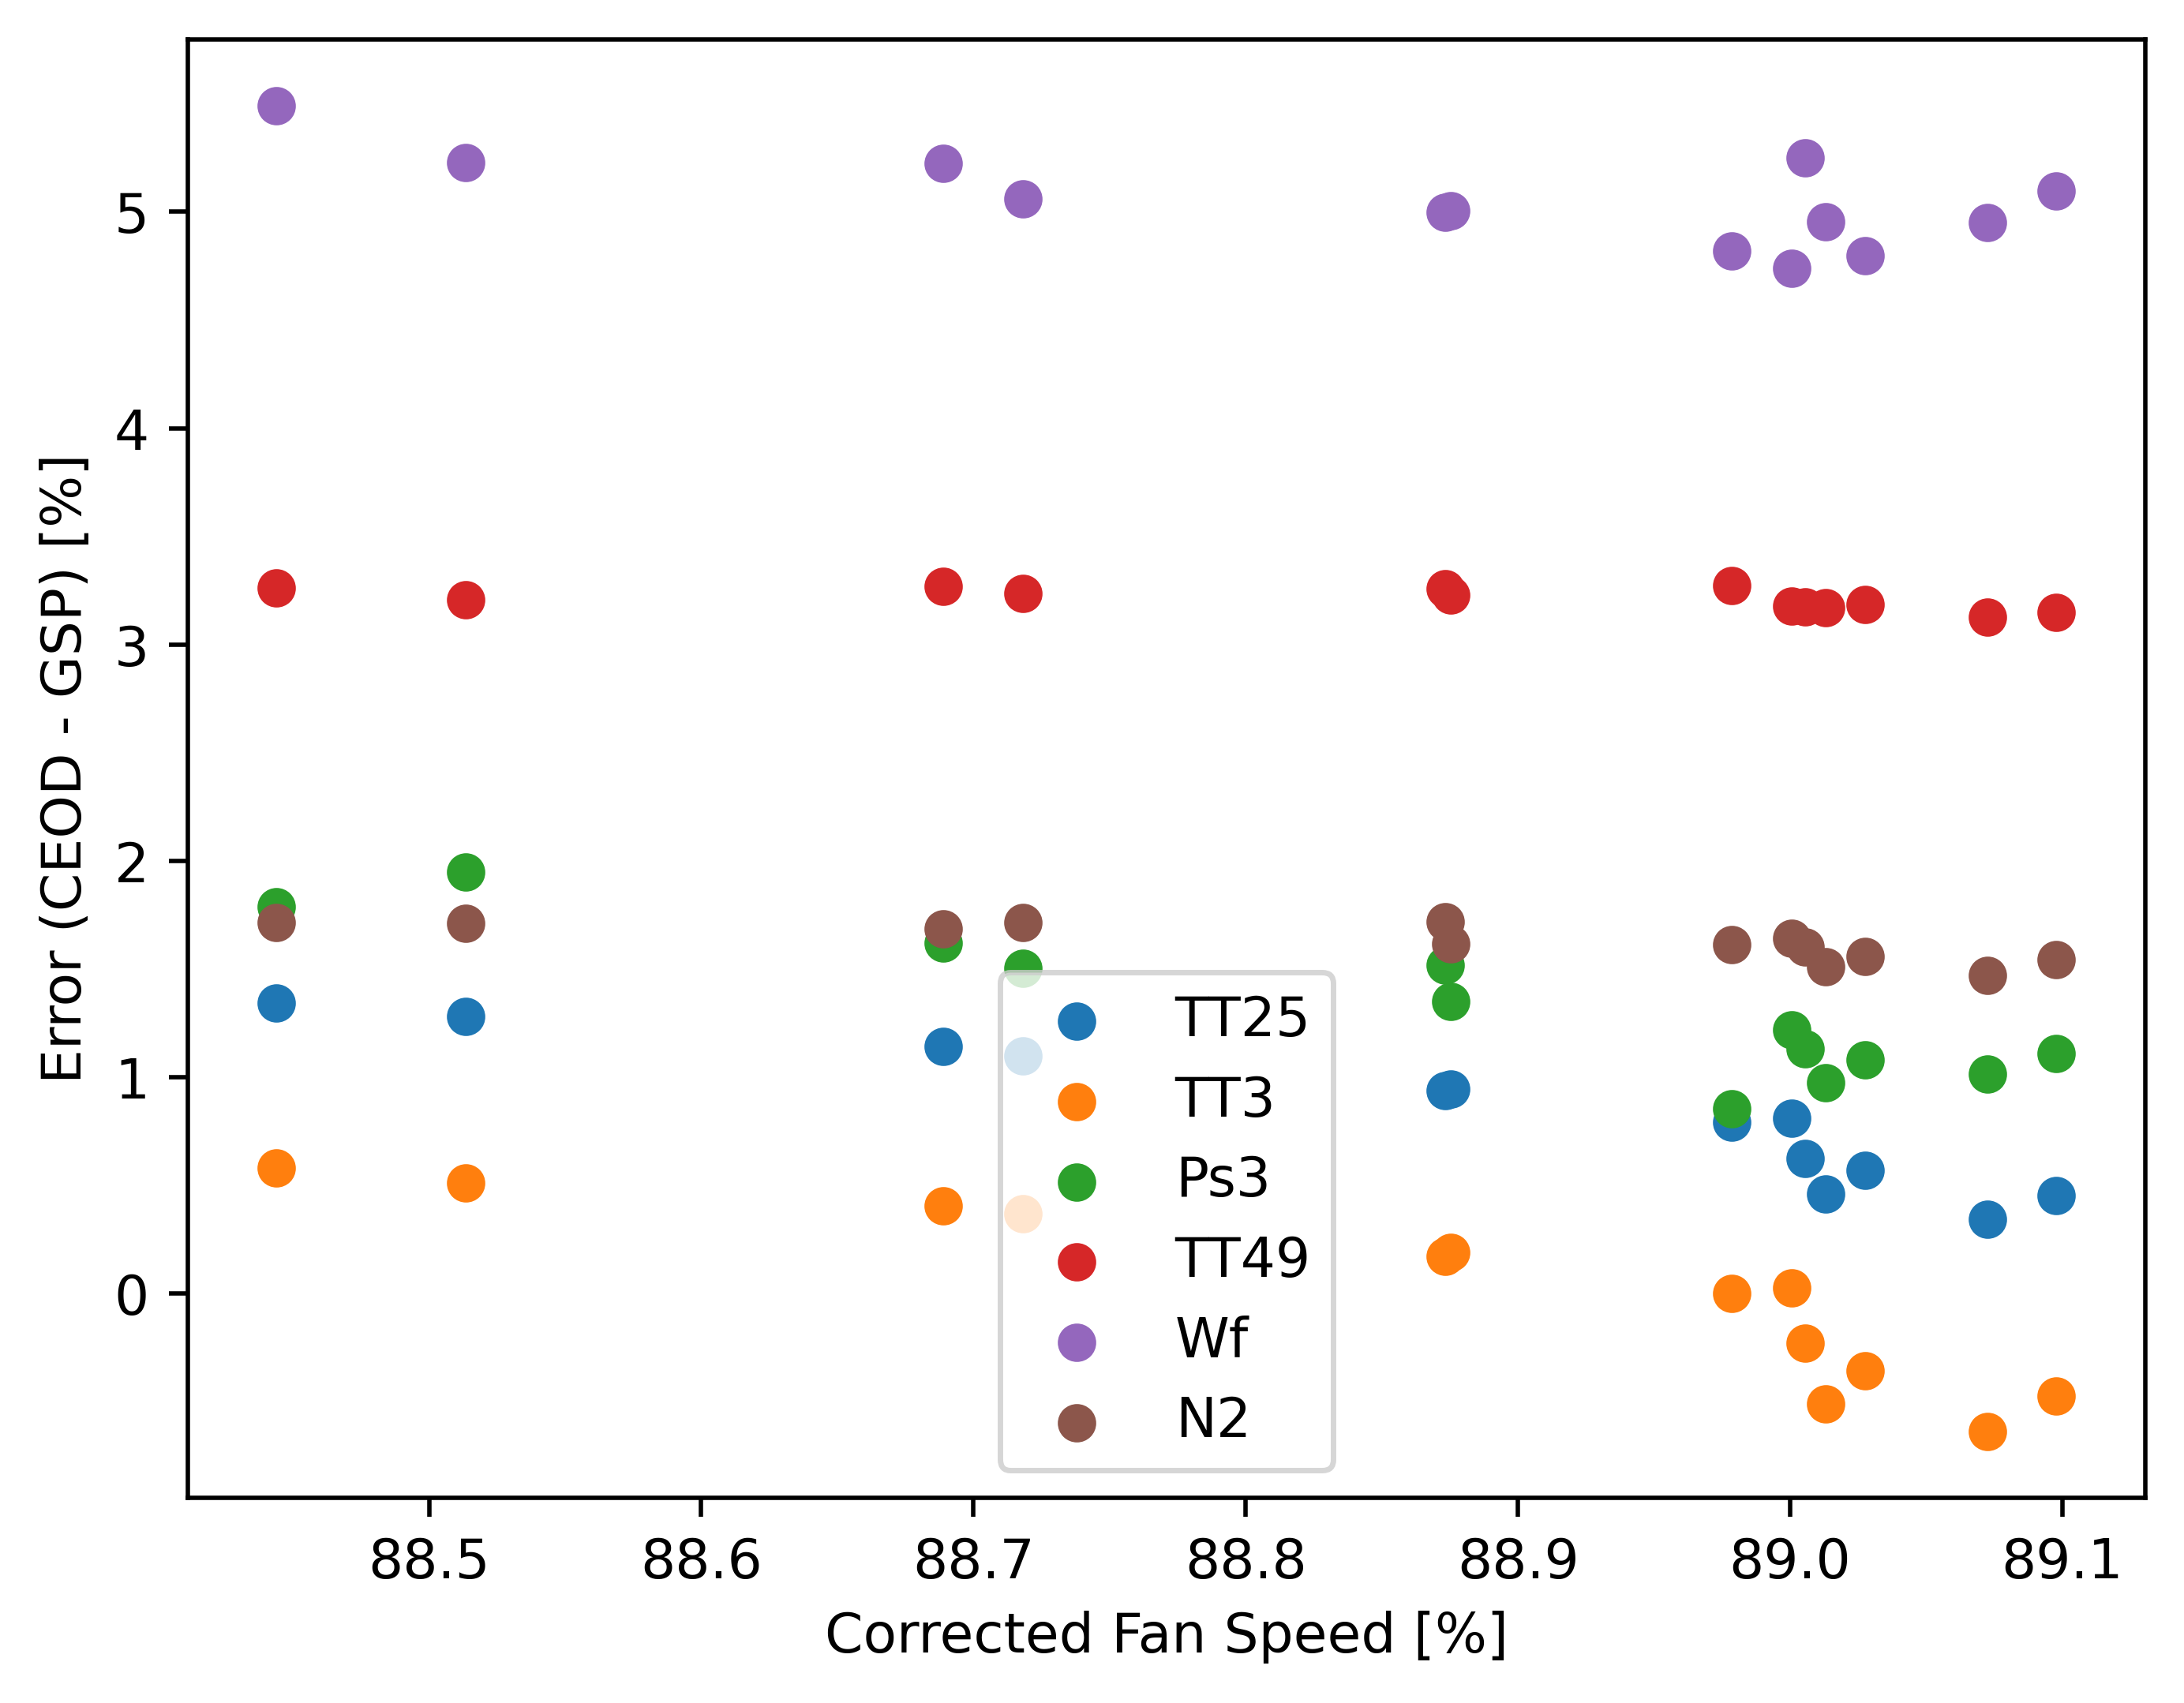

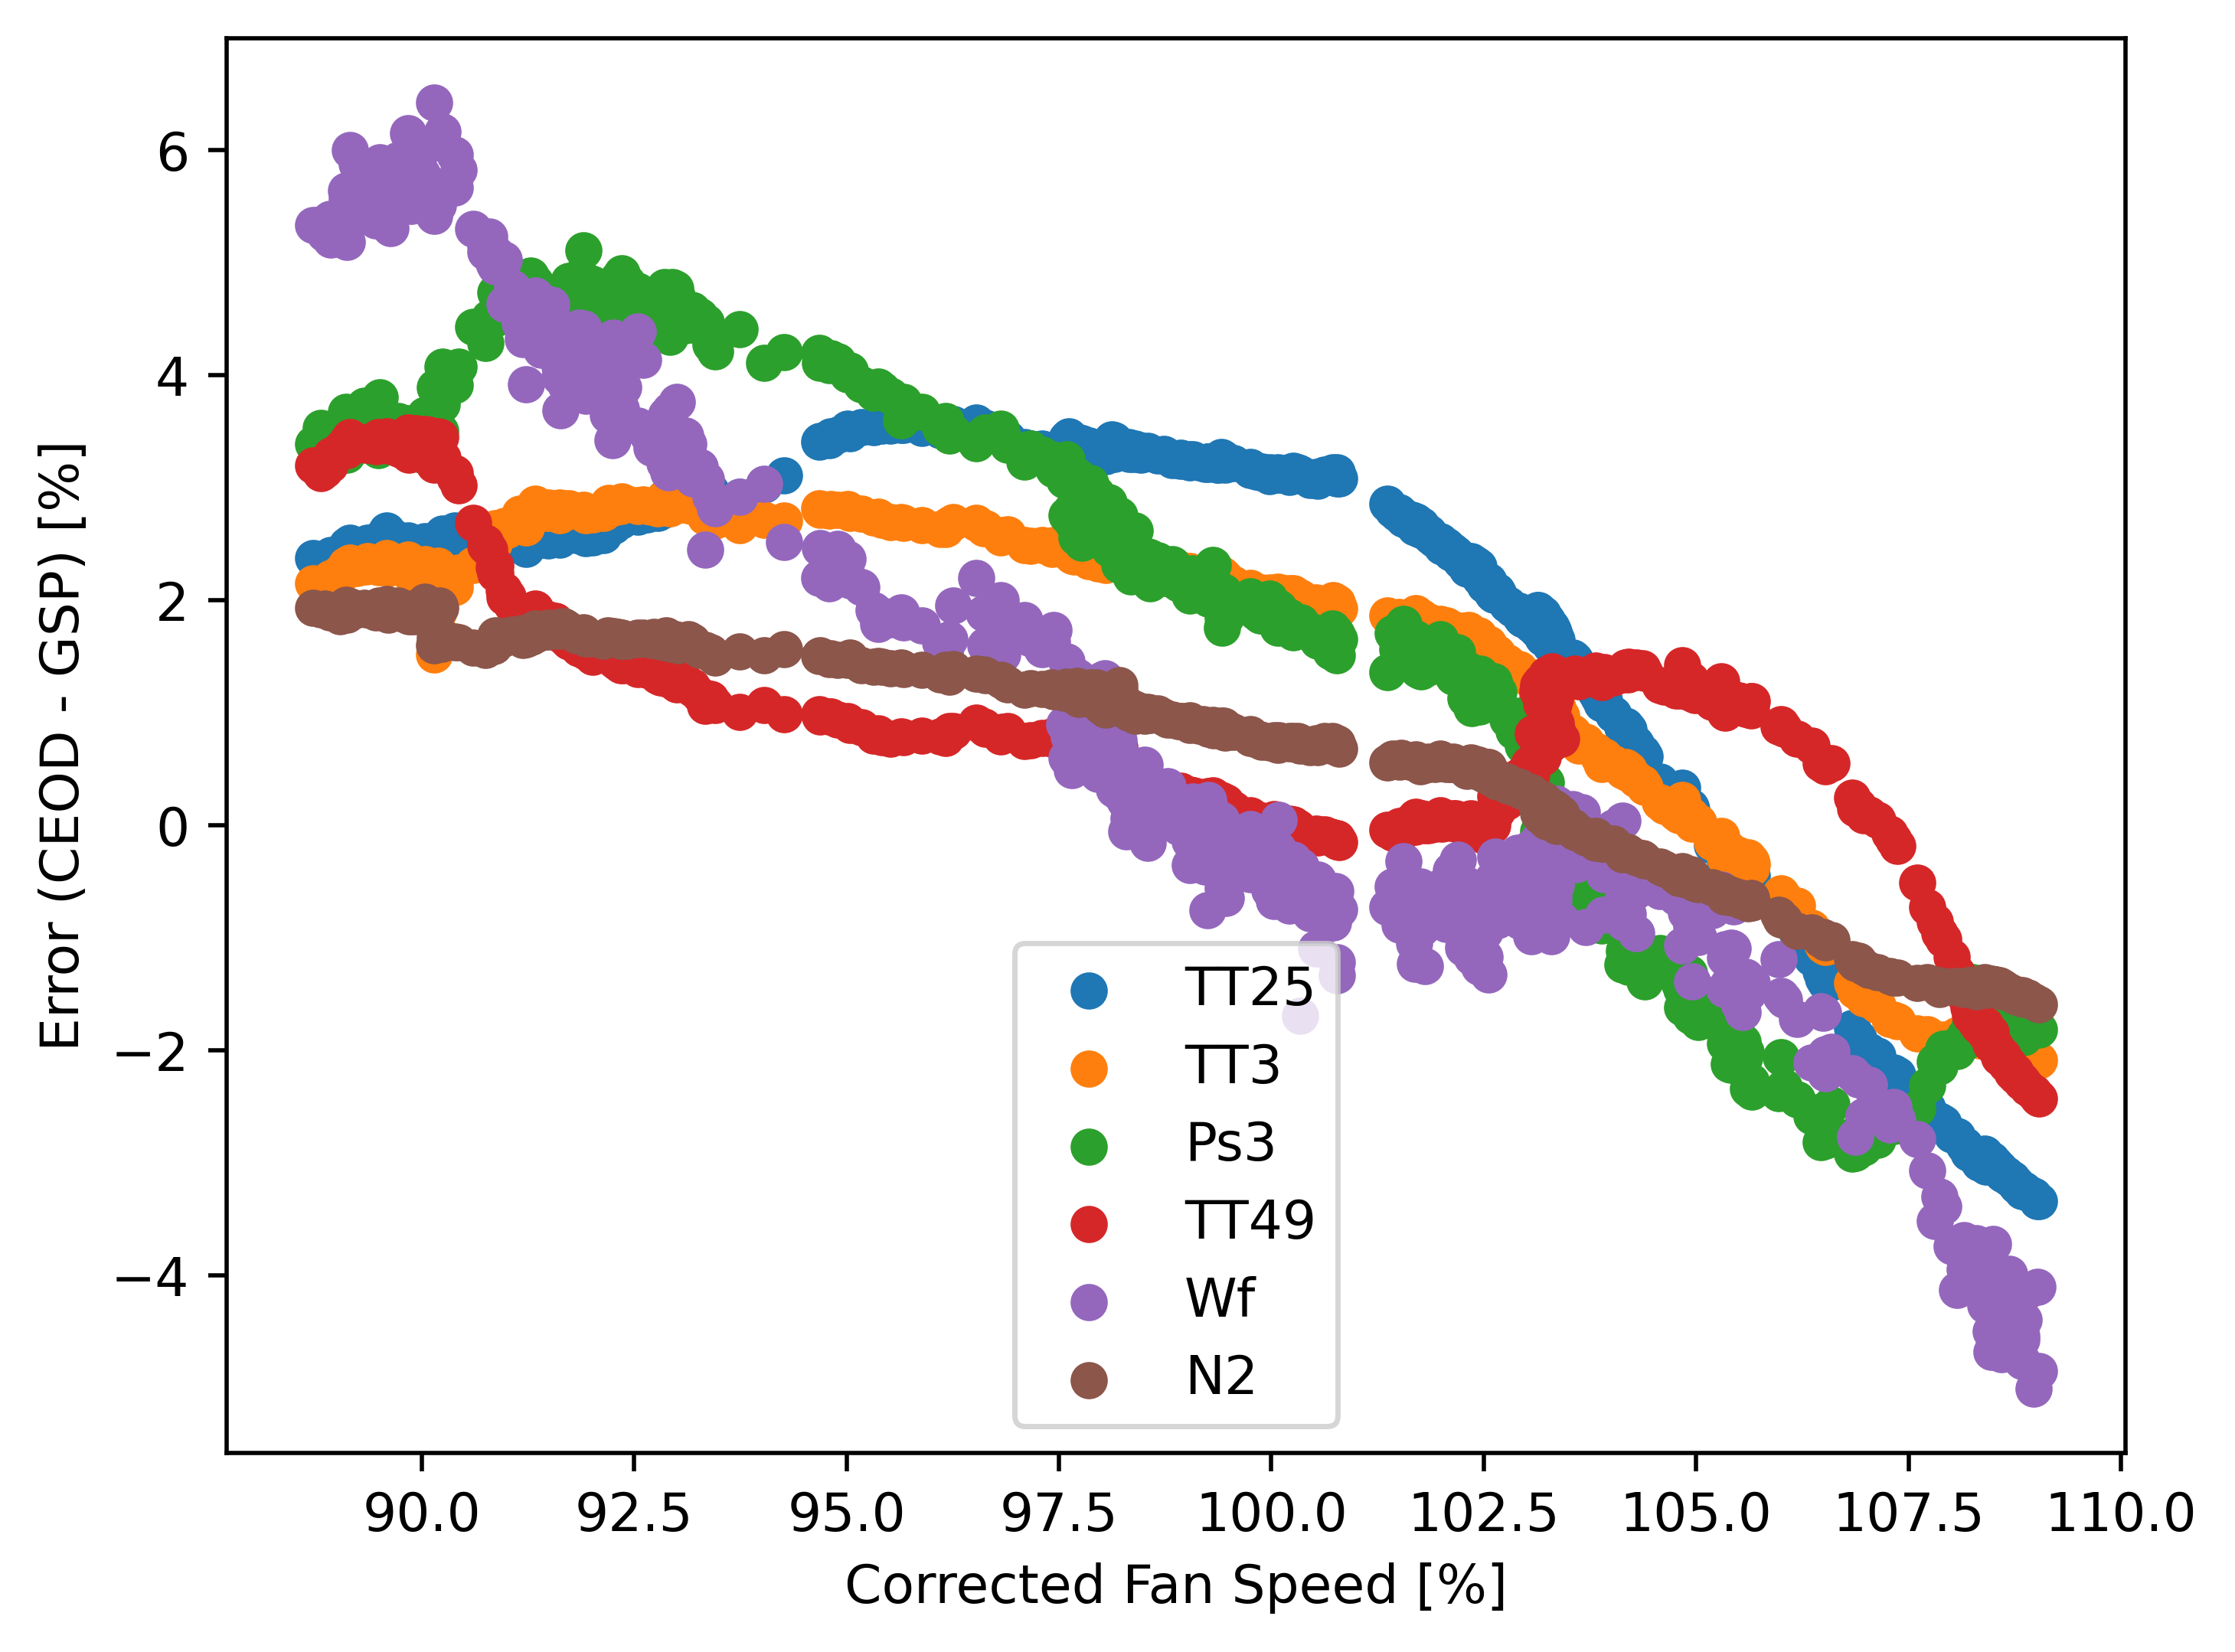

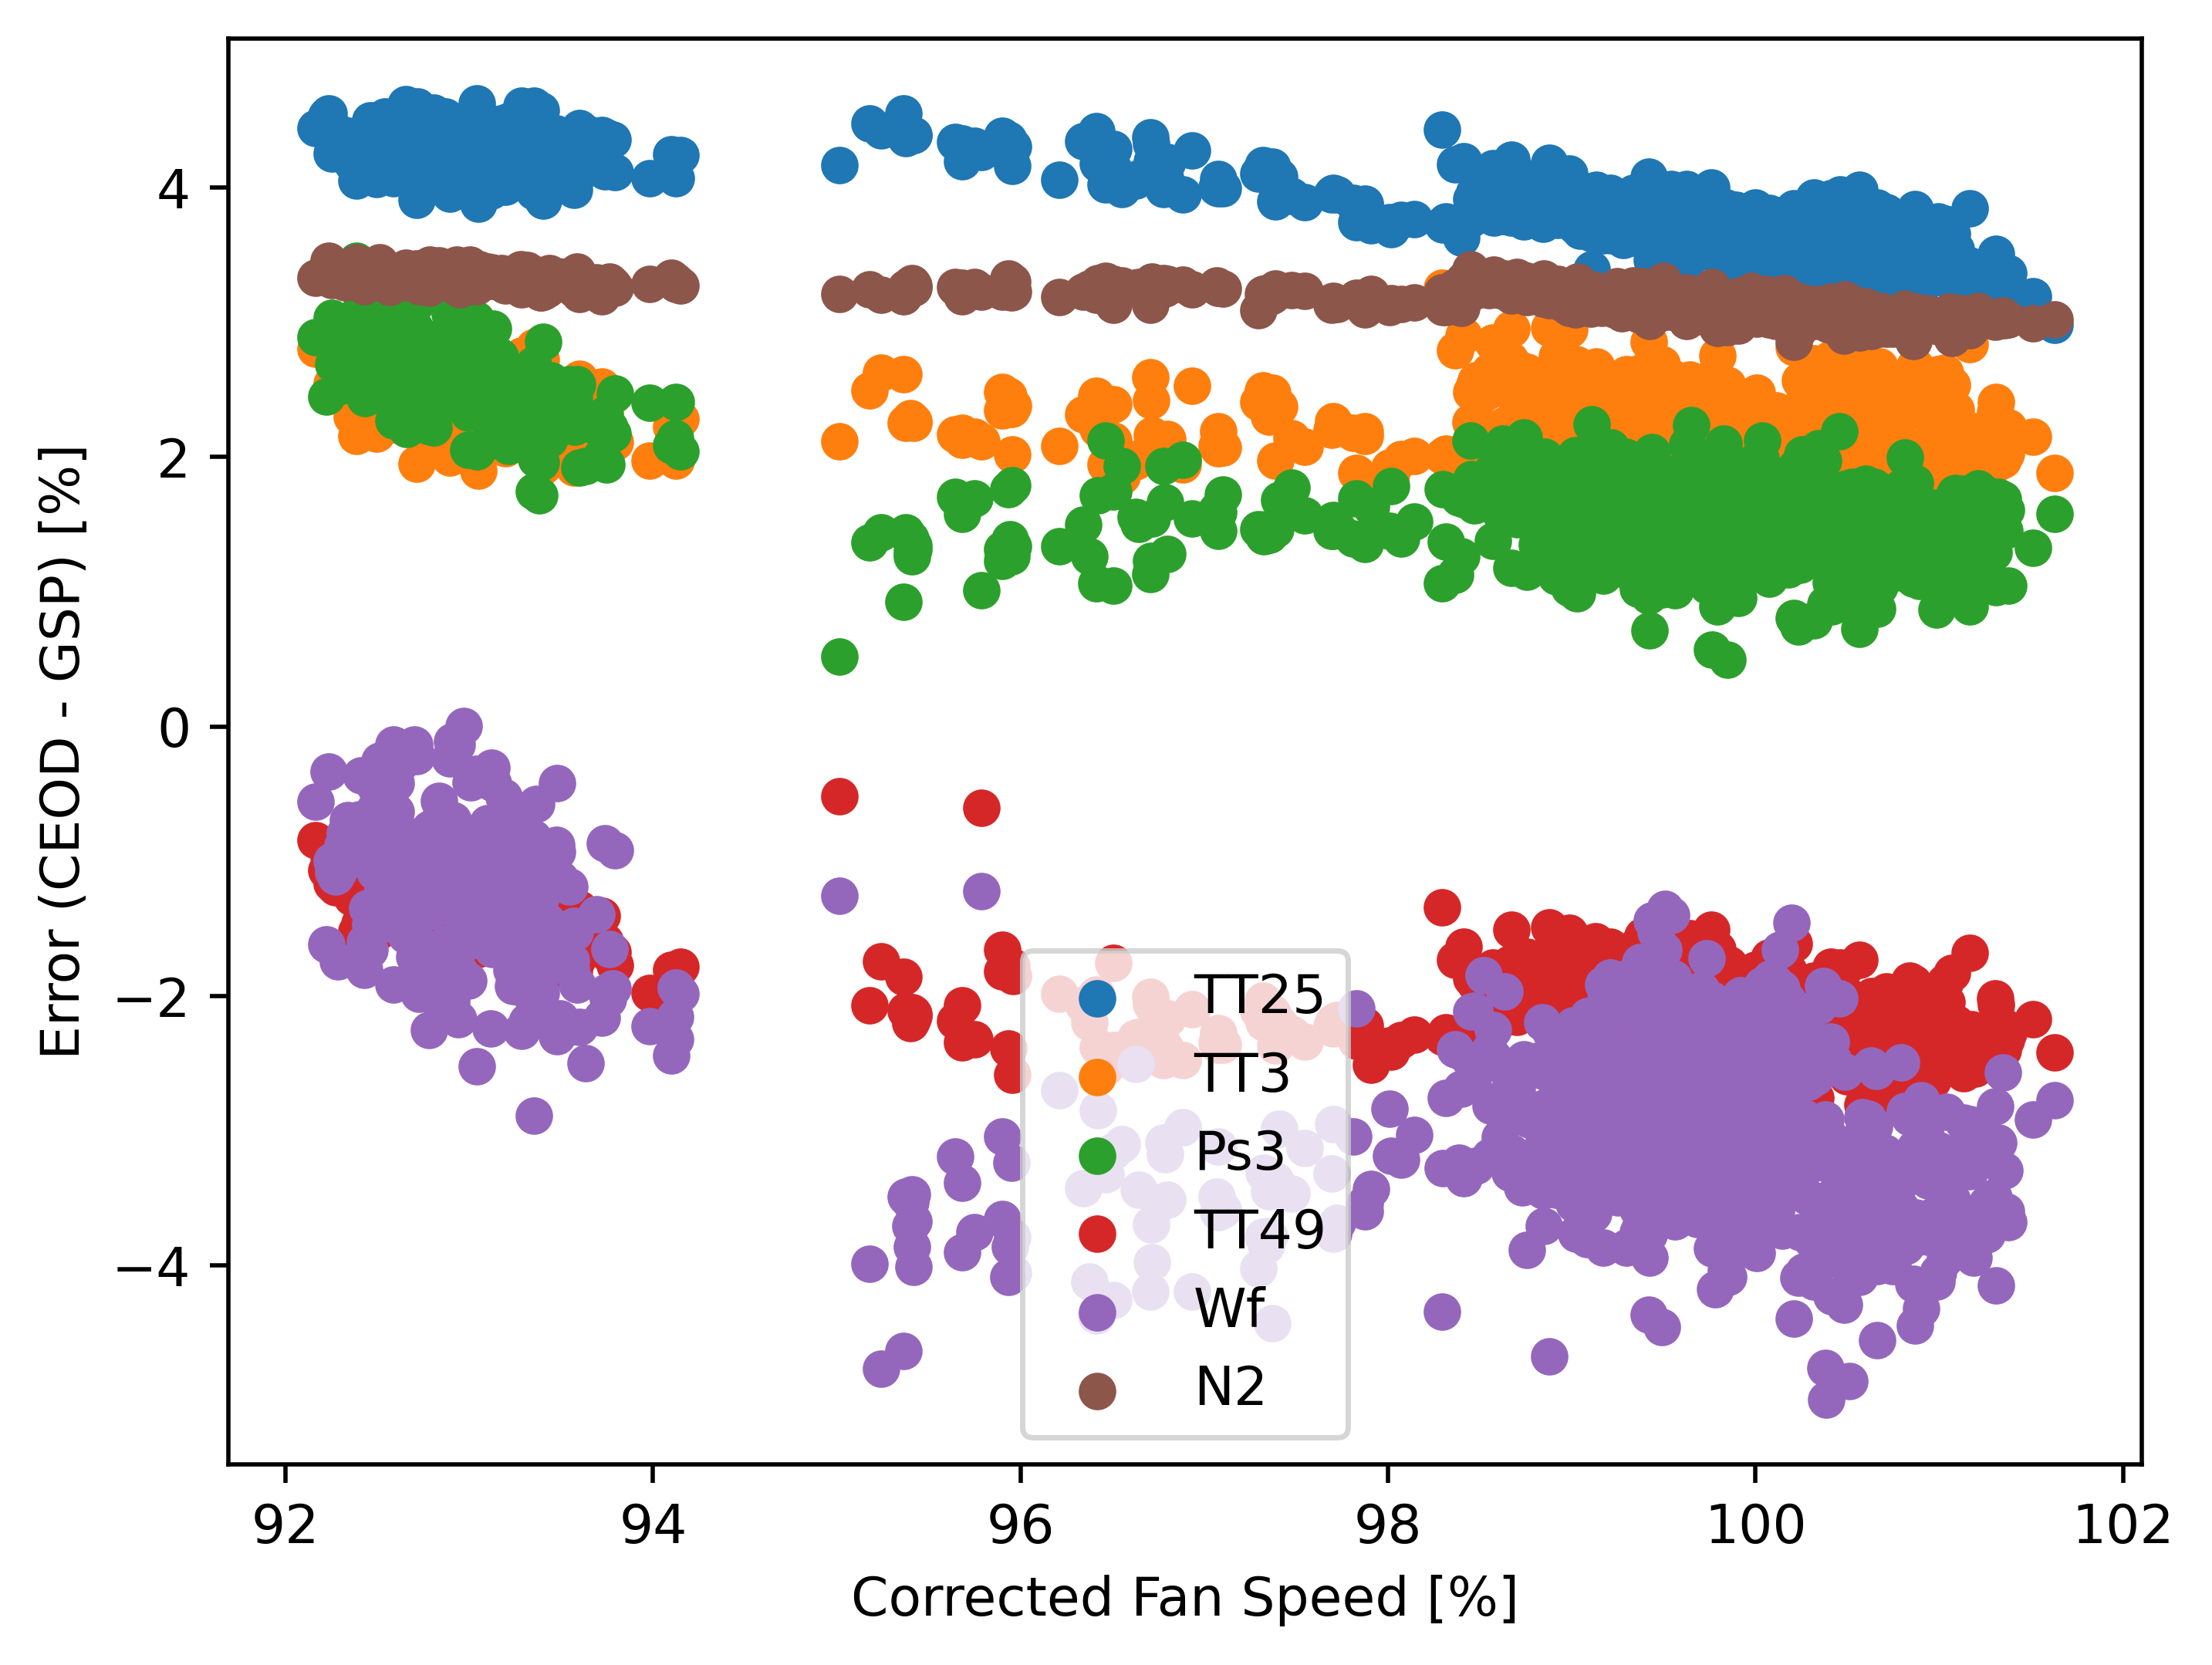

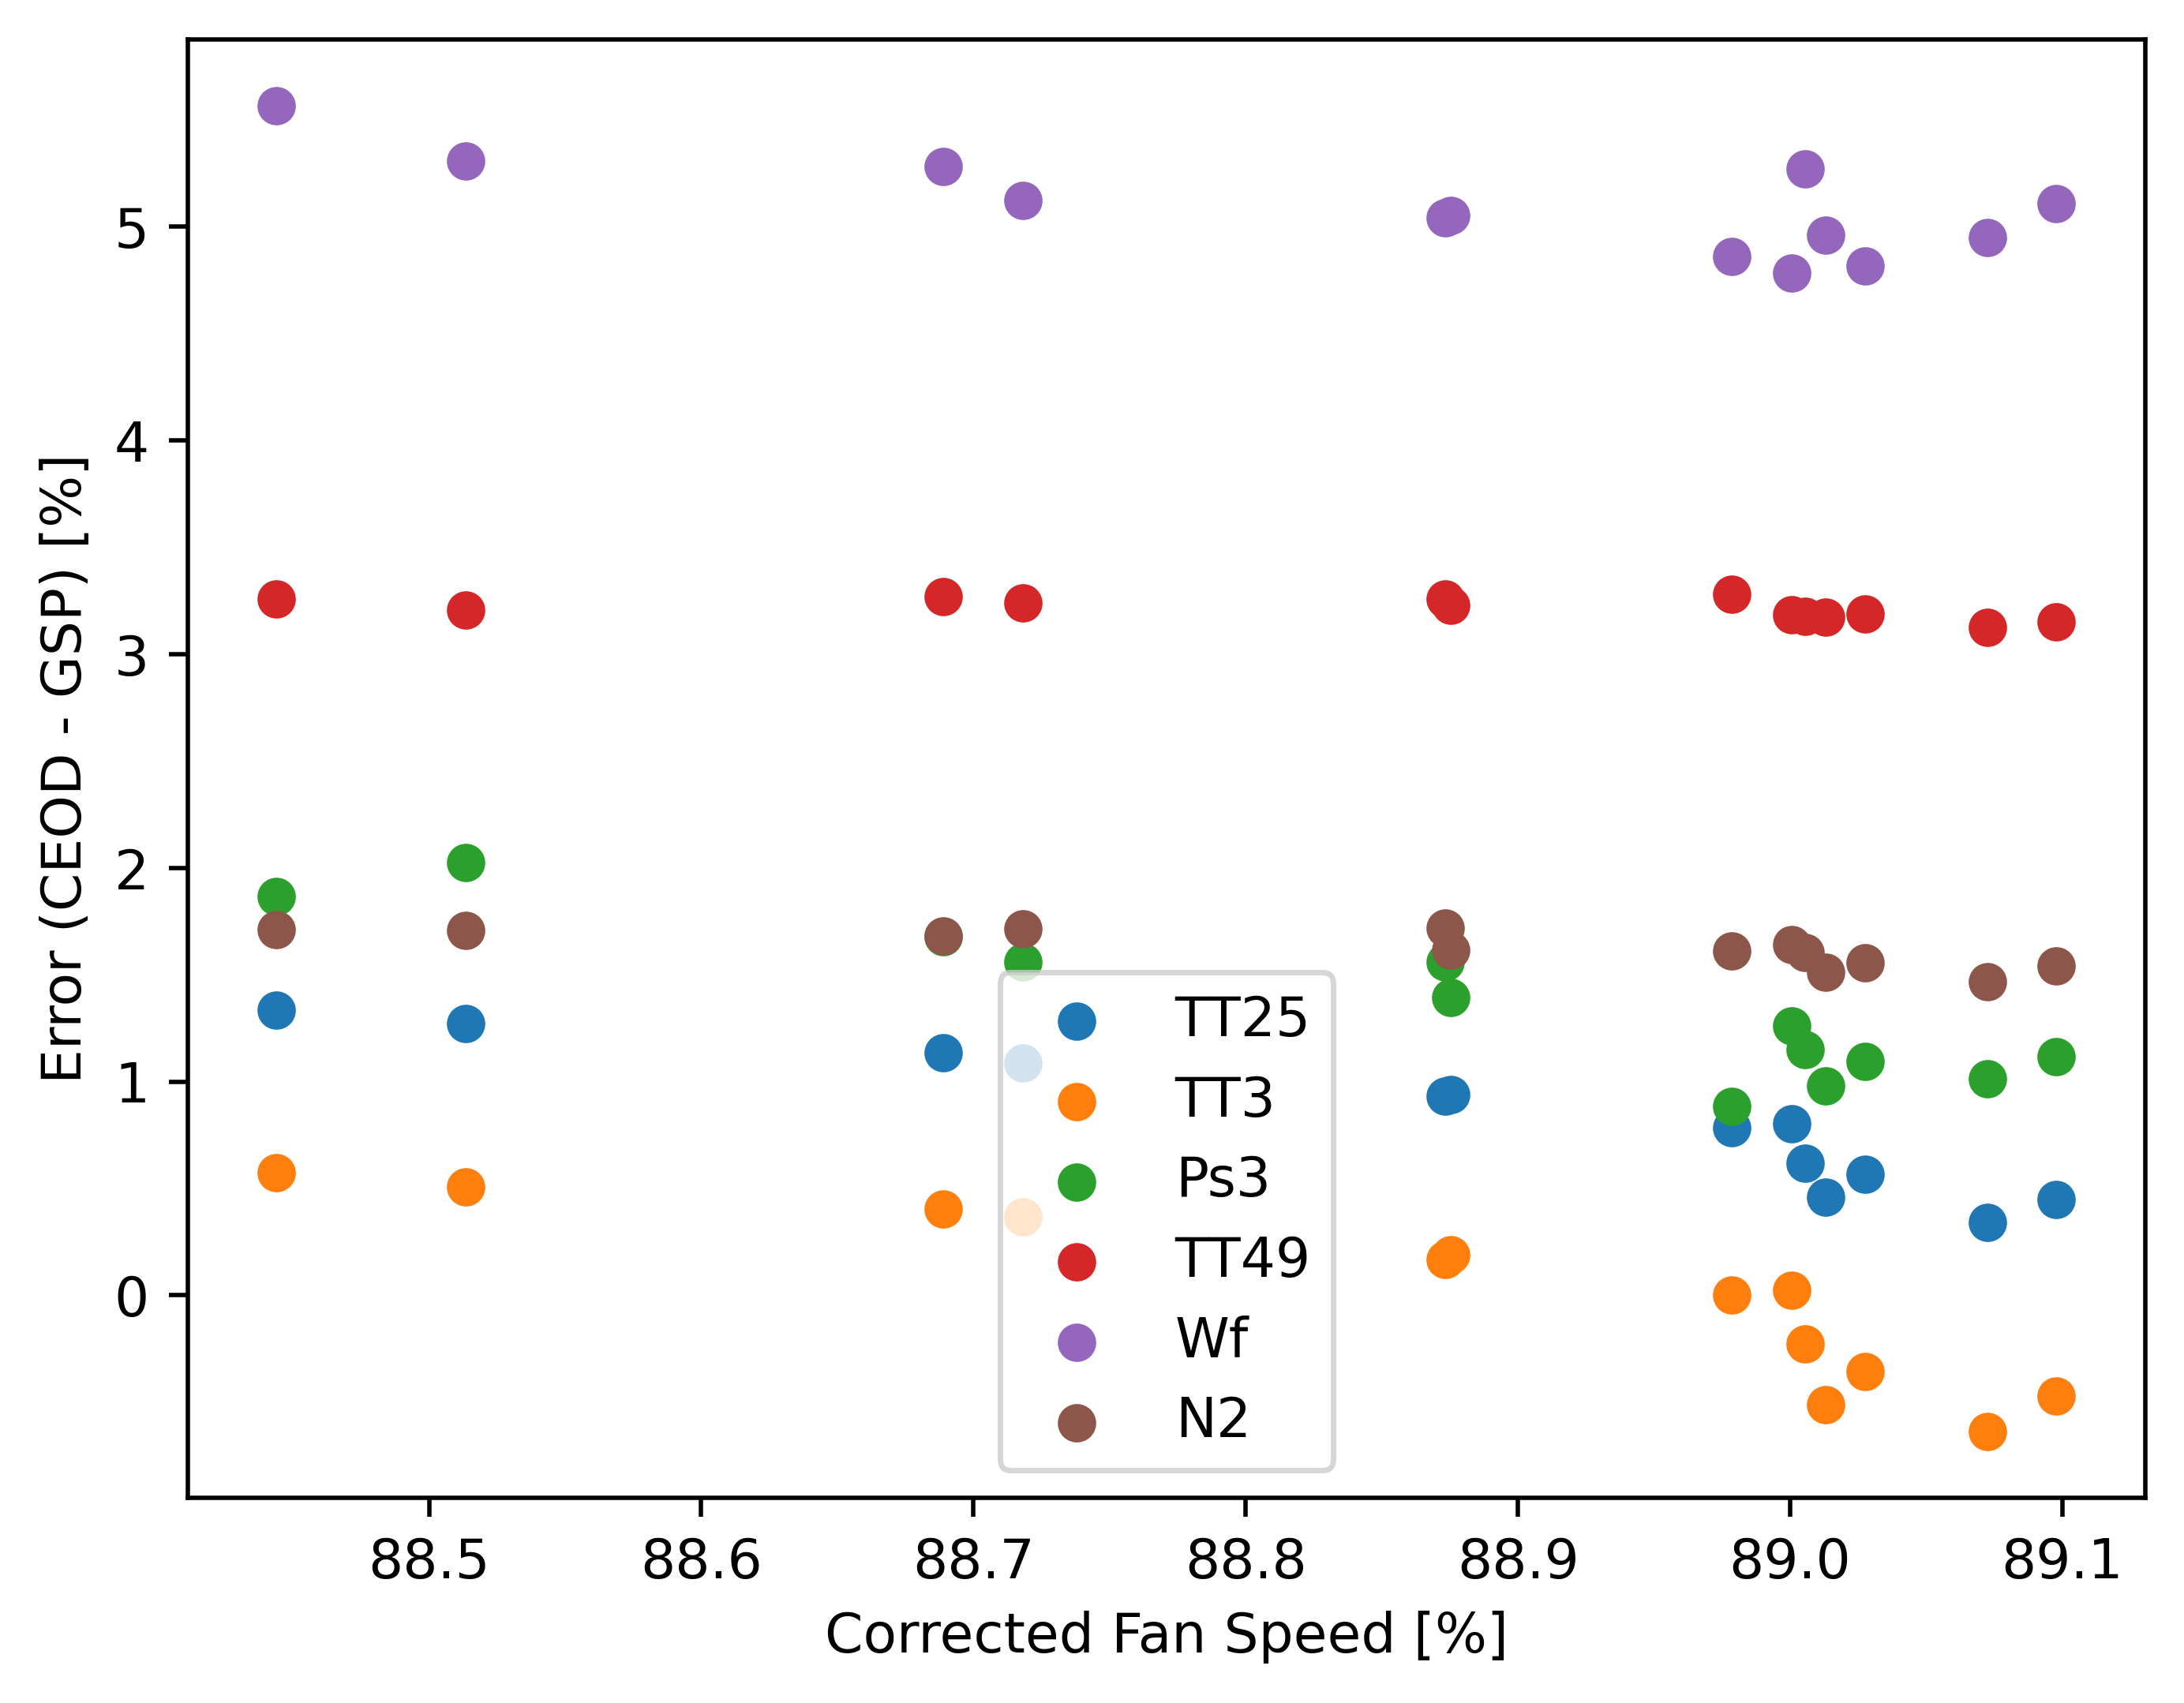

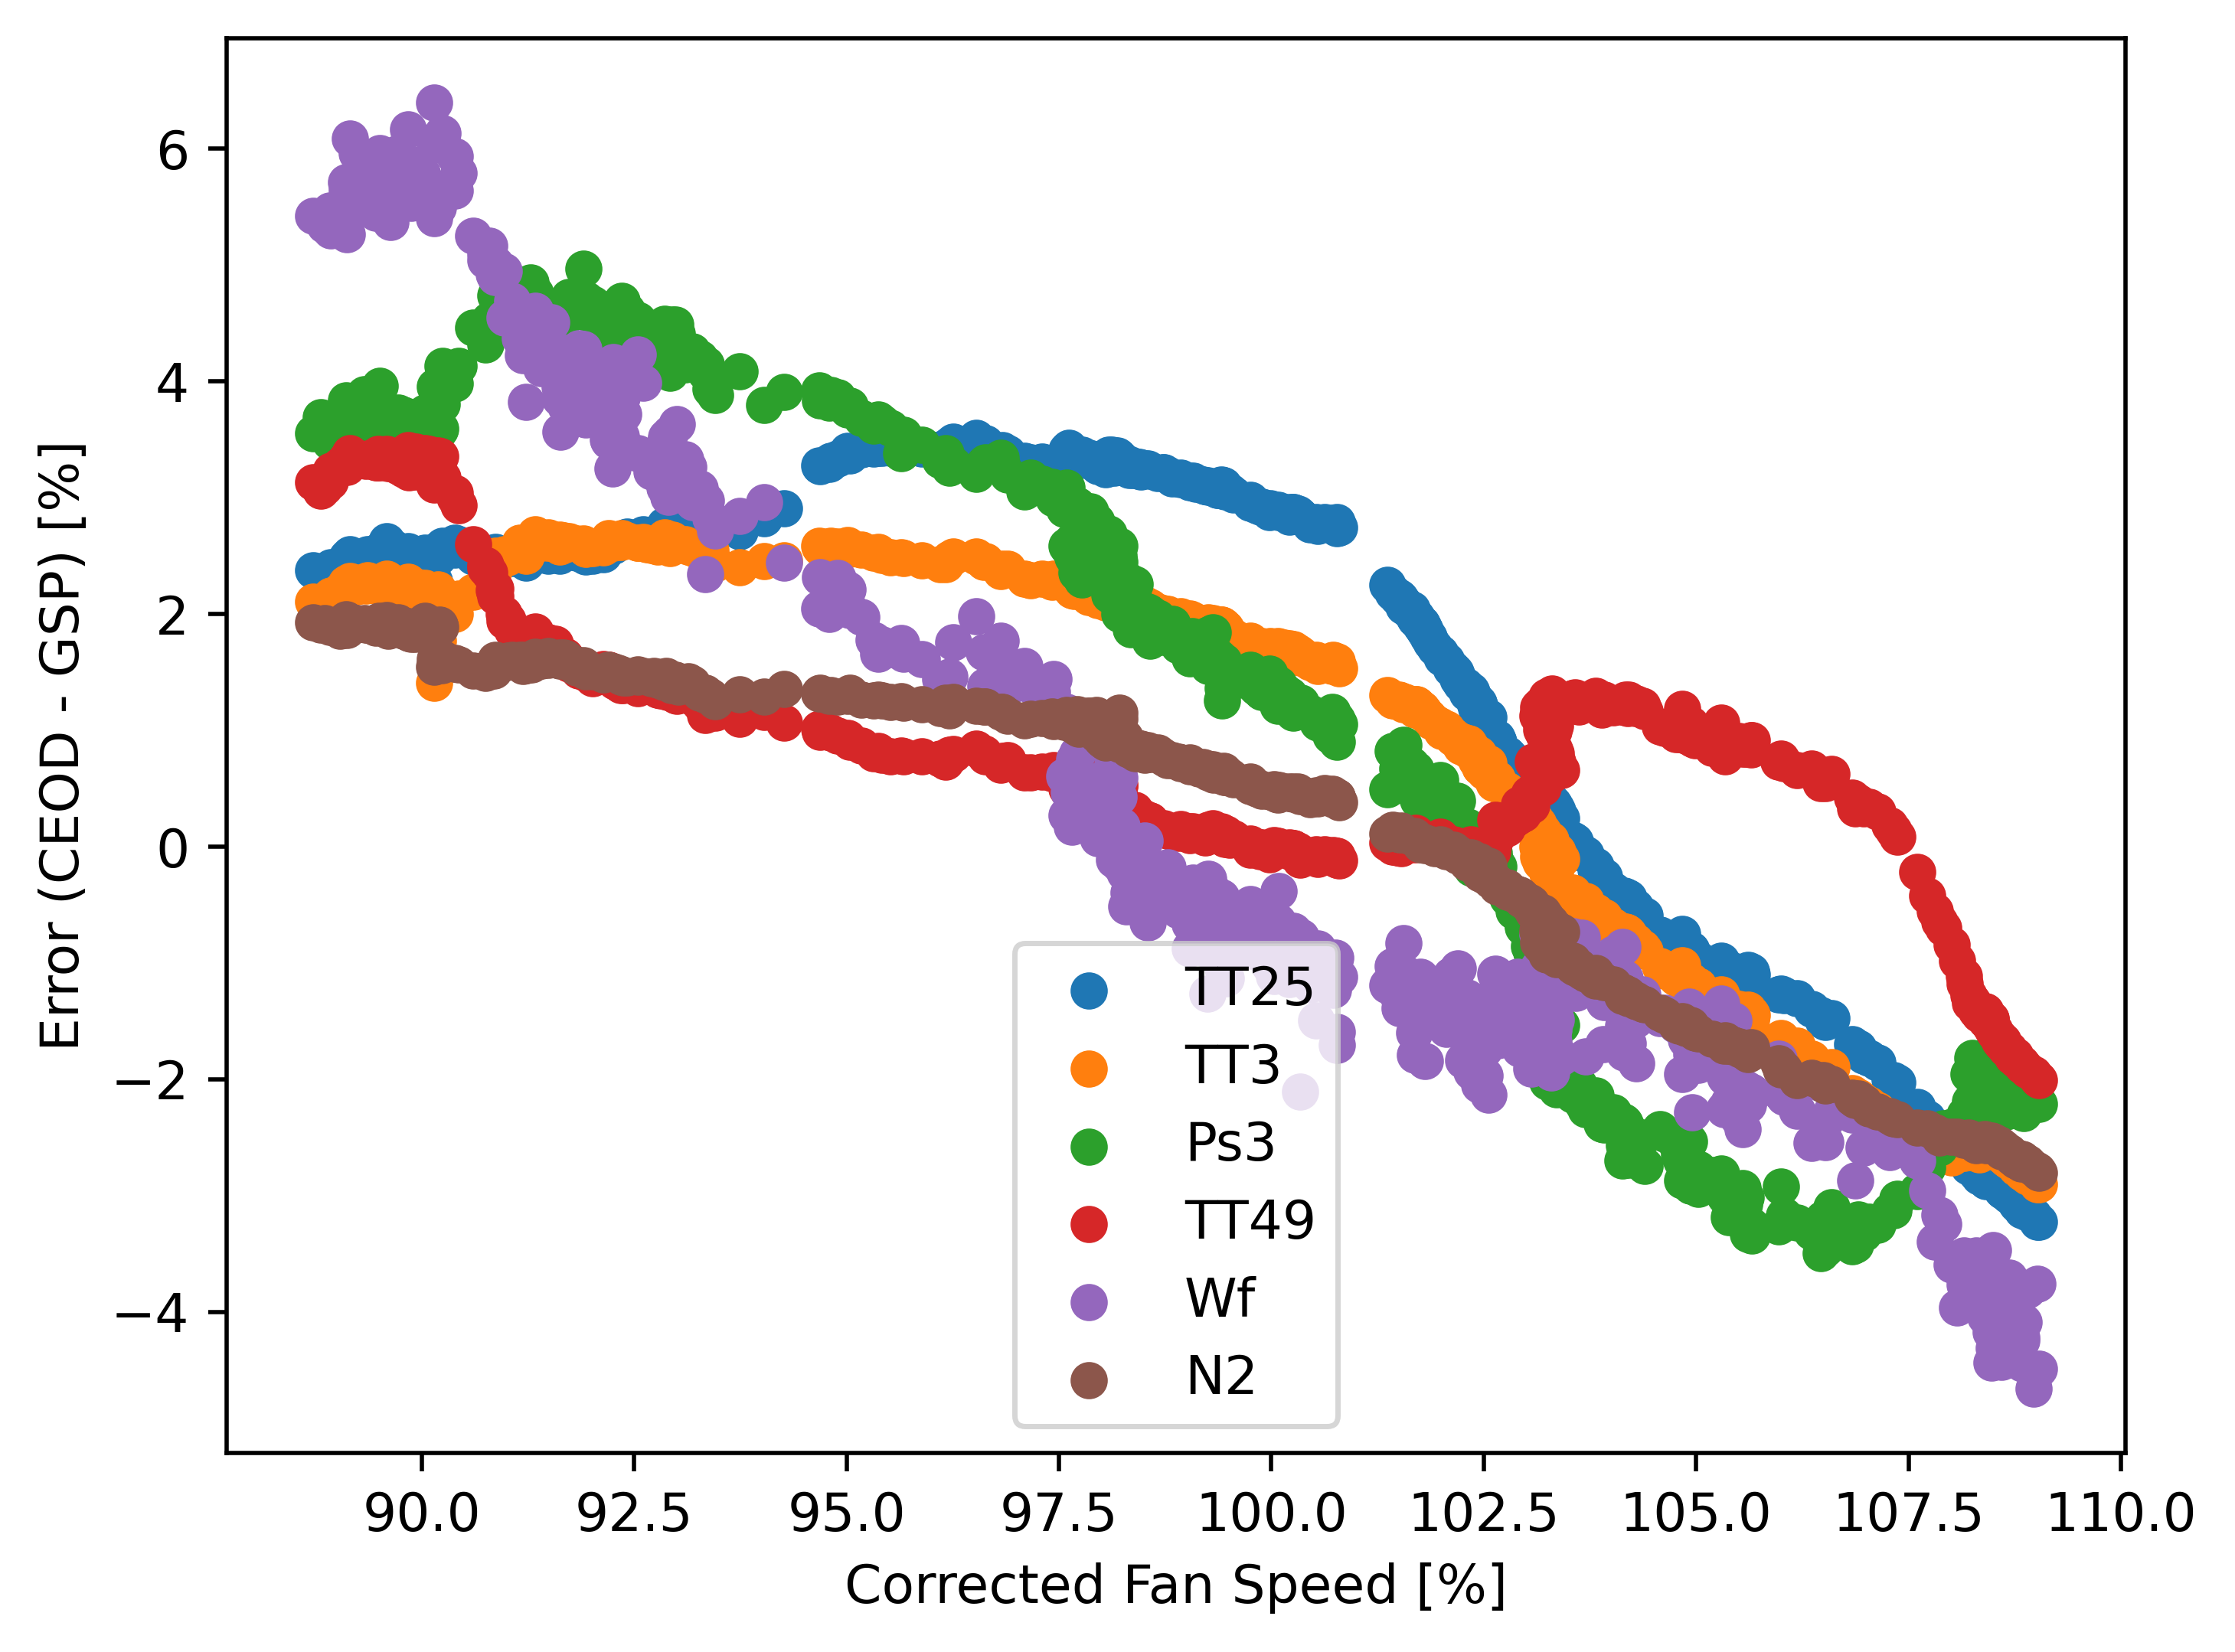

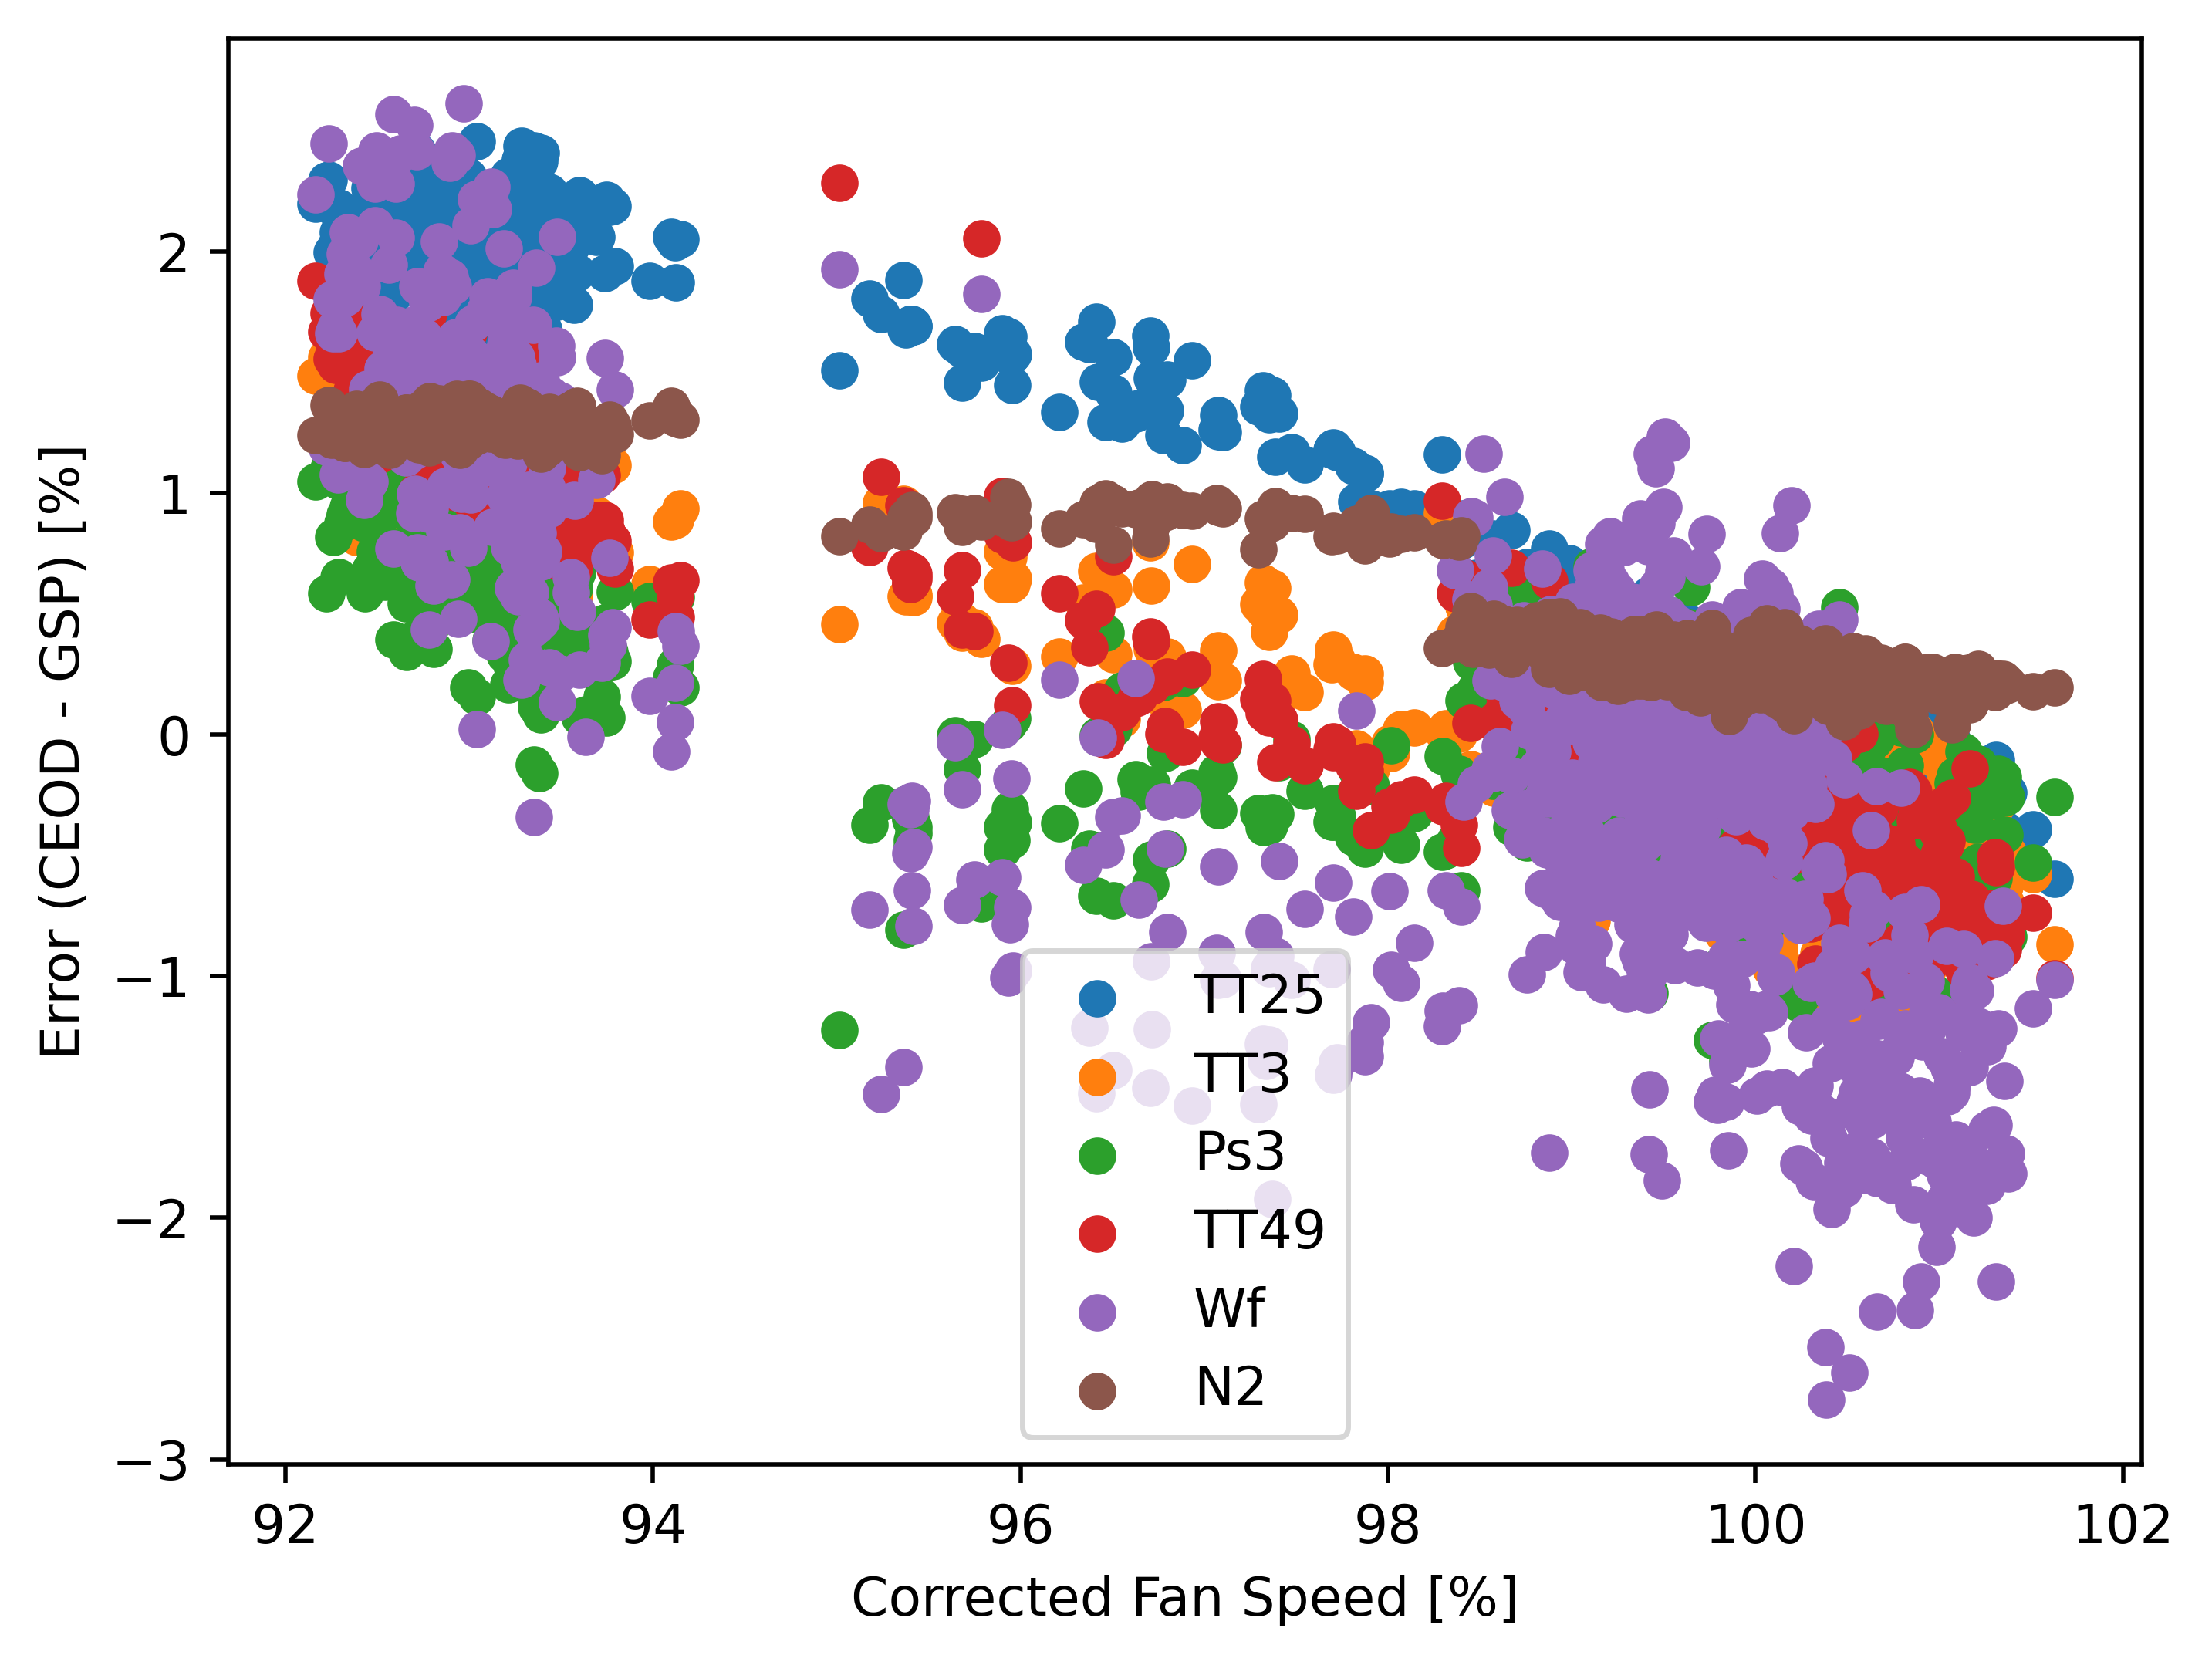

In [35]:
plot_error(All_Valid_params_NS, save_name=f'{file_name.strip("CEOD_").strip(".p")} With No Correction')
plot_error(All_Valid_params_WS, save_name=f'{file_name.strip("CEOD_").strip(".p")} With RE Correction')